In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy
import PyCO2SYS as pc
from os import sys
# sys.path.append('/home/hogikyan/xarray_climate_indices')
# sys.path.append('/home/hogikyan/xarrayutils/xarrayutils')
# import utils as ut
import cartopy.crs as ccrs
# from xhistogram.xarray import histogram


plt.rc('font', size = 14)
   
def annmean_3d(a, time):
    b = xr.DataArray(np.zeros((len(time), len(a.st_ocean), len(a.yt_ocean), len(a.xt_ocean))), coords = [time, a.st_ocean, a.yt_ocean, a.xt_ocean], dims = ['time', 'st_ocean', 'yt_ocean', 'xt_ocean'])
    for k in range(len(time)):
        b[k,:,:,:] = a[k*12:(k+1)*12,:,:,:].mean('time')
    return b
def annmean_2d(a, time):
    b = xr.DataArray(np.zeros((len(time), len(a.yt_ocean), len(a.xt_ocean))), coords = [time,a.yt_ocean, a.xt_ocean], dims = ['time',  'yt_ocean', 'xt_ocean'])
    for k in range(len(time)):
        b[k,:,:] = a[k*12:(k+1)*12,:,:].mean('time')
    return b


In [ ]:
path_to_tar = '/tiger/scratch/gpfs/hogikyan/'
with xr.open_dataset(path_to_tar+'sss_carbon_data/area.nc') as ds: 
    area = ds.area
with xr.open_dataset(path_to_tar+'/tiger/scratch/gpfs/hogikyan/sss_carbon_data/srestore_result_carbon.nc') as ds: #1% CO2 increase. Avg y70-100
    alk = ds.alk
    dic = ds.dic
    pH = ds.pH
    sst = ds.sst
    sss = ds.sss
    c_flux = ds.c_flux
    pH = ds.pH
    alloc = ds.mask

with xr.open_dataset(path_to_tar+'sss_carbon_data/srestore_result_carbon.nc') as ds: #1% CO2 increase with restored SSS. Avg y70-100
    alk_s = ds.alk
    dic_s = ds.dic
    pH_s = ds.pH
    sst_s = ds.sst
    sss_s = ds.sss
    c_flux_s = ds.c_flux
    pH_s = ds['pH_fix-sss']
    dpH_FWhydro = ds.dpH_FWhydro
    dpH_Thydro = ds.dpH_Thydro
#     mask_alloc = ds.mask

with xr.open_dataset(path_to_tar+'sss_carbon_data/fixclim_result_carbon.nc') #1% CO2 increase only for chem, not radiatively interactive. Avg y70-100
    alk_fc
    dic_fc
    pH_fc = ds.pH
    sst_fc = ds.sst
    sss_fc = ds.sss
    c_flux_fc = ds.c_flux
    pH_fc = ds['pH_fix-clim']
    dpH_FWclim_fc = ds.dpH_FWclim
    dpH_Tclim_fc = ds.dpH_Tclim
#     mask_alloc = ds.mask



/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in divide
  return f_raw(*args, **kwargs)


/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packa

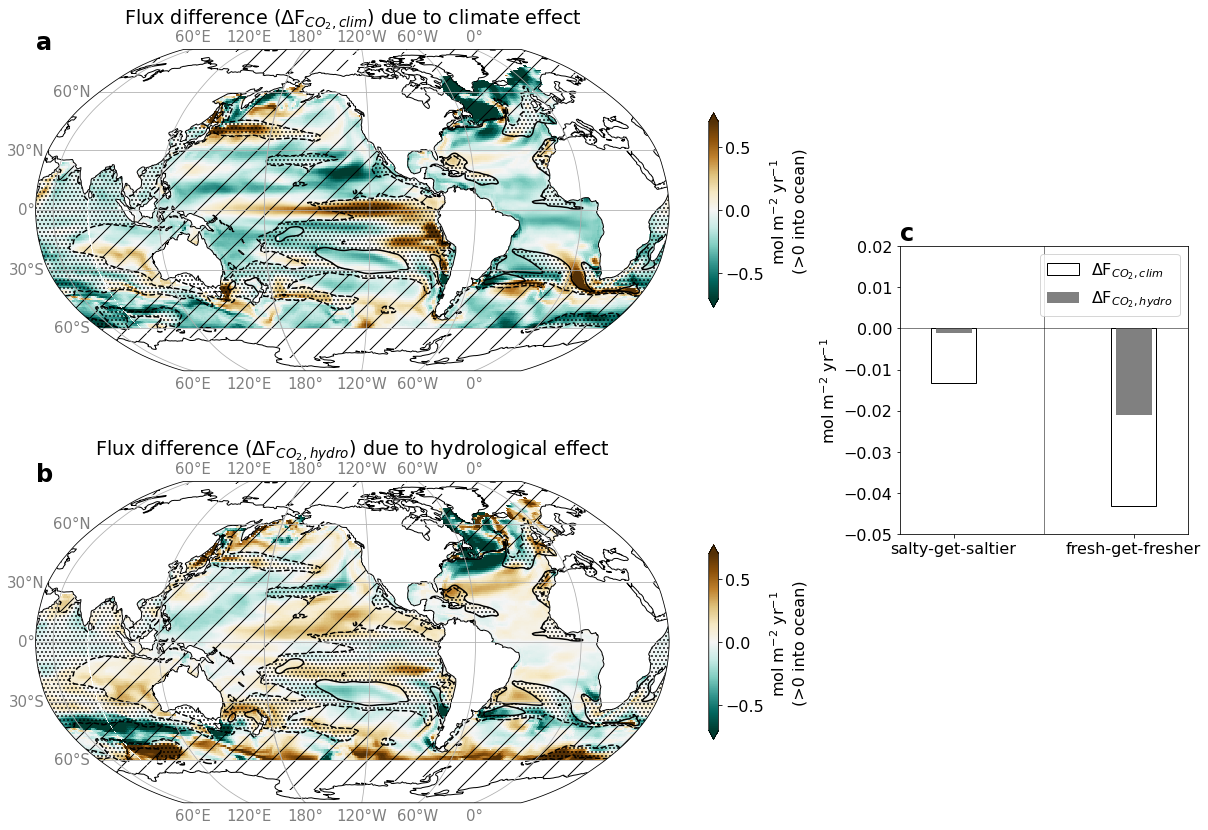

In [16]:
plt.rc('font', size=16)


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(c_flux - c_flux_fc).where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'mol m$^{-2}$ yr$^{-1}$ \n(>0 into ocean)'}, cmap='BrBG_r', vmin = -.7, vmax = .7,)
(sss - sss_s).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
ax0.set_title('Flux difference ($\Delta$F$_{CO_2, clim}$) due to climate effect')
ax0.set_global()

ax2 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(c_flux - c_flux_s).where(alloc==1).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'mol m$^{-2}$ yr$^{-1}$ \n(>0 into ocean)'},vmin = -.7, vmax = .7, cmap='BrBG_r')
(sss - sss_s).plot.contour(ax=ax2, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
ax2.set_title('Flux difference ($\Delta$F$_{CO_2, hydro}$) due to hydrological effect')
ax2.set_global()



fcflux_fresh = ((c_flux - c_flux_fc).where((sss - sss_fc)<-0.1)*area/area.sum(['yt_ocean', 'xt_ocean'])).sum(['yt_ocean', 'xt_ocean'])
fcflux_salty = ((c_flux - c_flux_fc).where((sss - sss_fc)>0.1)*area/area.sum(['yt_ocean', 'xt_ocean'])).sum(['yt_ocean', 'xt_ocean'])
sflux_fresh = ((c_flux - c_flux_s).where((sss - sss_s)<-0.1)*area/area.sum(['yt_ocean', 'xt_ocean'])).sum(['yt_ocean', 'xt_ocean'])
sflux_salty = ((c_flux - c_flux_s).where((sss - sss_s)>0.1)*area/area.sum(['yt_ocean', 'xt_ocean'])).sum(['yt_ocean', 'xt_ocean'])
ax1 = fig.add_axes((1.2,.6,.4,.4),)
ax1.bar(1,fcflux_salty,width=.25, color='none', edgecolor='k',label='$\Delta$F$_{CO_2, clim}$')
ax1.bar(2,fcflux_fresh,width=.25, color='none', edgecolor='k')
ax1.bar(1,sflux_salty,width=.2, color='grey',label='$\Delta$F$_{CO_2, hydro}$')
ax1.bar(2,sflux_fresh,width=.2, color='grey')
ax1.set_ylabel('mol m$^{-2}$ yr$^{-1}$')
ax1.set_xticks([1,2], ['salty-get-saltier', 'fresh-get-fresher'])
ax1.set_xlim(.7,2.3)
ax1.set_ylim(-.05,.02)
ax1.axhline(0,color='k', linewidth=.5)
ax1.axvline(1.5,color='k', linewidth=.5)
ax1.legend()


ax0.text(0,1,'a',fontweight='bold',fontsize=24,transform=ax0.transAxes)
ax2.text(0,1,'b',fontweight='bold',fontsize=24,transform=ax2.transAxes)
ax1.text(0,1.02,'c',fontweight='bold',fontsize=24,transform=ax1.transAxes)

fig.savefig('flux_clim_hydro.pdf',format='pdf',dpi=300,bbox_inches='tight')


In [18]:
# # # HYDRO
ds_frac = (sss - sss_s) / sss_s
# ds_frac = (alk-alk_s)/alk_s
alk_std_dilute = (ds_frac+1)*alk_s
dic_std_dilute = (ds_frac+1)*dic_s
d_dic_sst = - 7 * (sst - sst_s)
def get_ph(par1_, par2_, par1_type_, par2_type_, salinity_, temperature_,):
    # Alk, DIC in umol/kg
    # atm pCO2 in uatm
    # salinity in psu
    # temp in ˚C
    result=pc.sys(par1=par1_, par2=par2_, par1_type=par1_type_, par2_type=par2_type_, salinity=salinity_, temperature=temperature_,)
    return result['pH']


ph_fix = xr.apply_ufunc(get_ph,             alk_s*1e6,          dic_s*1e6,1, 2,sss_s, sst_s - 273.15, dask="parallelized", output_dtypes=[s_s[0,:].dtype],)
ph_dilute = xr.apply_ufunc(get_ph, alk_std_dilute*1e6, dic_std_dilute*1e6,1, 2,sss_s, sst_s - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])
ph_net_t = xr.apply_ufunc(get_ph, alk_s*1e6,     (dic_s*1e6 + d_dic_sst), 1, 2,sss_s, sst - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])

# ph_sst = xr.apply_ufunc(get_ph, alk_s*1e6,     (dic_s*1e6 ), 1, 2,s_s, t - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])
# ph_dic_t = xr.apply_ufunc(get_ph, alk_s*1e6,     (dic_s*1e6 +d_dic_sst), 1, 2,s_s, t_s - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])



In [19]:
# # # CLIM
ds_frac_clim = (sss - sss_fc) / sss_fc
# ds_frac_clim = (alk - alk_fc) / alk_fc
alk_std_dilute_clim = (ds_frac_clim+1)*alk_fc
dic_std_dilute_clim = (ds_frac_clim+1)*dic_fc
d_dic_sst_clim = - 7 * (sst - sst_fc)
def get_ph(par1_, par2_, par1_type_, par2_type_, salinity_, temperature_,):
    # Alk, DIC in umol/kg
    # atm pCO2 in uatm
    # salinity in psu
    # temp in ˚C
    result=pc.sys(par1=par1_, par2=par2_, par1_type=par1_type_, par2_type=par2_type_, salinity=salinity_, temperature=temperature_,)
    return result['pH']


ph_fix_clim = xr.apply_ufunc(get_ph,     alk_fc*1e6,          dic_fc*1e6,      1, 2,sss_fc, sst_fc - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype],)
ph_dilute_clim = xr.apply_ufunc(get_ph, alk_std_dilute_clim*1e6, dic_std_dilute_clim*1e6,1, 2,sss_fc, sst_fc - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])
ph_net_t_clim = xr.apply_ufunc(get_ph, alk_fc*1e6,     (dic_fc*1e6 + d_dic_sst_clim), 1, 2,sss_fc, sst - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])

# ph_sst_clim = xr.apply_ufunc(get_ph, alk_fc*1e6,          (dic_fc*1e6 ),       1, 2,s_fc, t - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])
# ph_dic_t_clim = xr.apply_ufunc(get_ph, alk_fc*1e6,     (dic_fc*1e6 +d_dic_sst), 1, 2,s_fc, t_fc - 273.15, dask="parallelized", output_dtypes=[s[0,:].dtype])



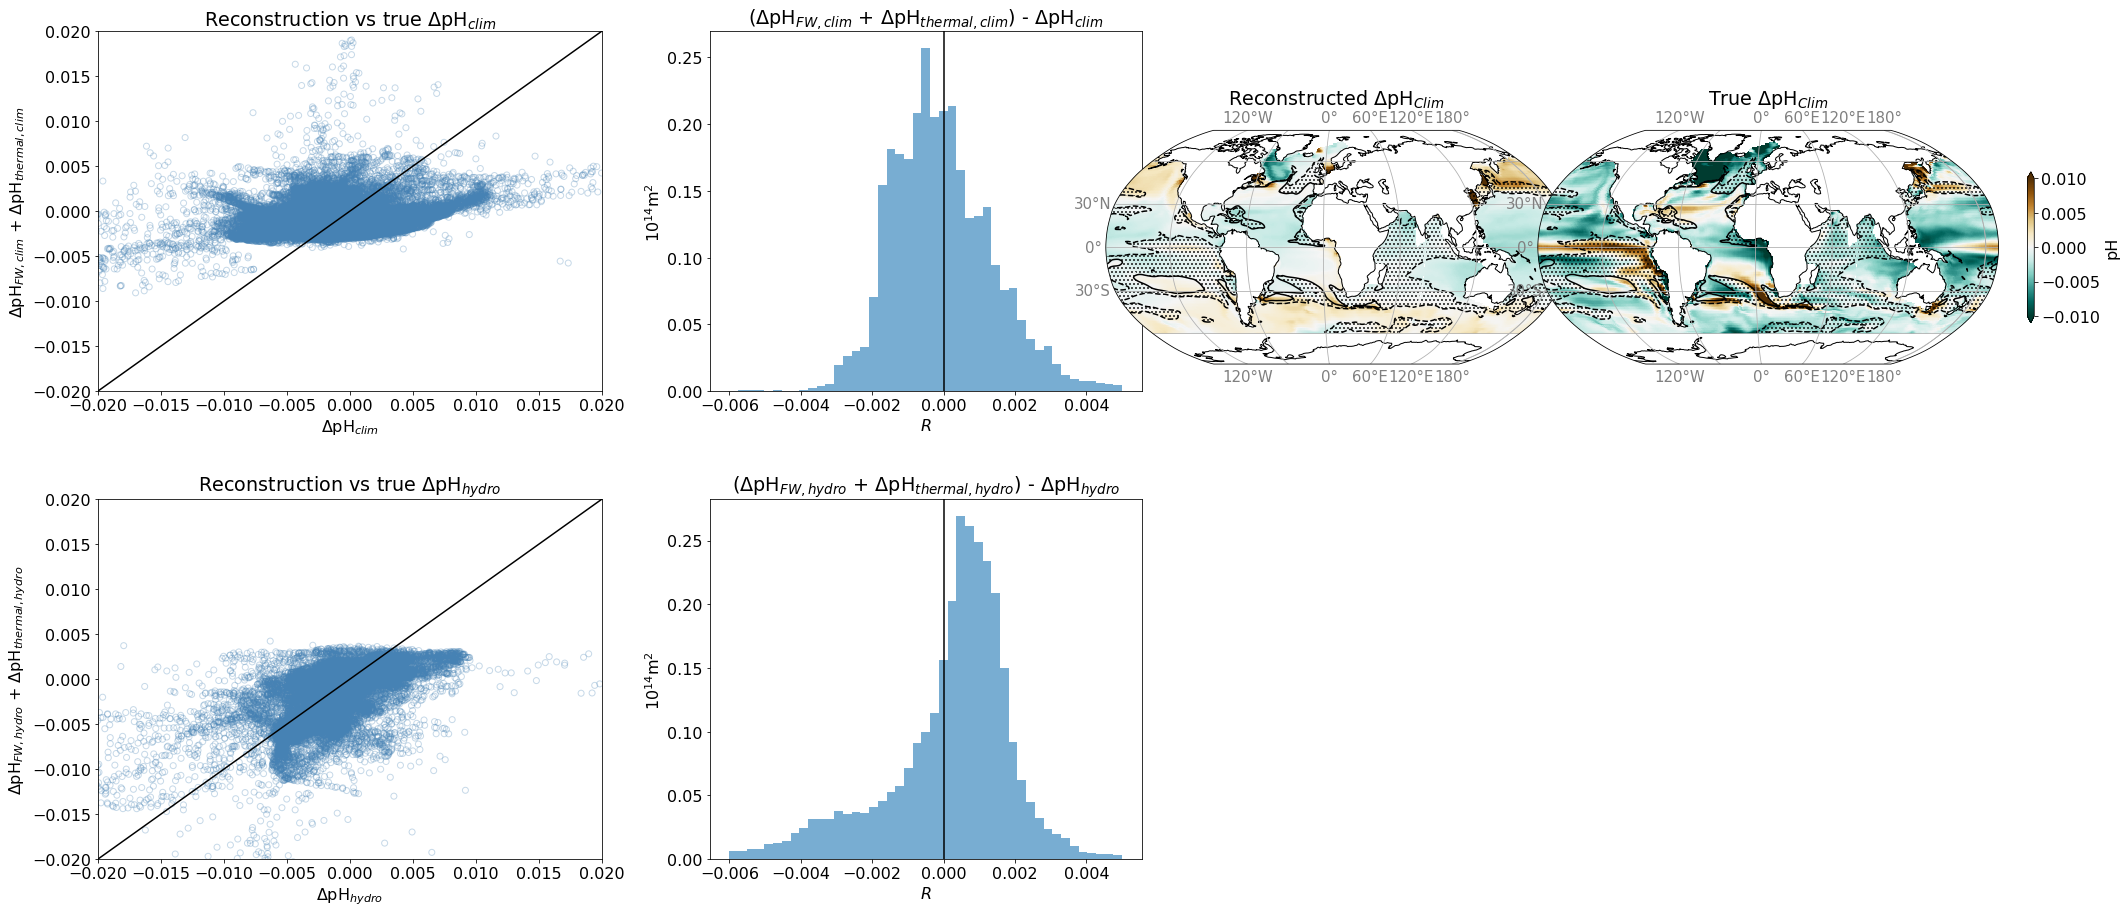

In [168]:
from scipy.stats import linregress
phclim_est = (ph_dilute_clim+ph_net_t_clim-2*ph_fix_clim).where(alloc==1)
phhydro_est = (ph_dilute+ph_net_t - 2*ph_fix).where(alloc==1)
x1 = (pH - pH_fc).where(alloc==1).values.ravel()
y1 = phclim_est.values.ravel()
clim_params = linregress(x1[~np.isnan(x1)], y1[~np.isnan(x1)])

x2 = (pH - pH_s).where(alloc==1).values.ravel()
y2 = phhydro_est.values.ravel()
hydro_params = linregress(x2[~np.isnan(x2)], y2[~np.isnan(x2)])

fig = plt.figure(figsize=(10,10))

ax0 = fig.add_axes((0,.65,.7,.5))
ax0.scatter(x1, y1, color='none',edgecolor='steelblue',alpha=.3,)
ax0.plot(np.arange(-1,1.5),np.arange(-1,1.5),color='k')
ax0.set_xlim(-.02,.02)
ax0.set_ylim(-.02,.02)
ax0.set_title('Reconstruction vs true $\Delta$pH$_{clim}$')
ax0.set_xlabel('$\Delta$pH$_{clim}$')
ax0.set_ylabel('$\Delta$pH$_{FW, clim}$ + $\Delta$pH$_{thermal, clim}$')

ax1 = fig.add_axes((.85,.65,.6,.5))
err1 = y1 - (clim_params.intercept+ clim_params.slope*x1)
ax1.hist(err1, bins=45, range=(-0.006,.005), weights=area.where(alloc==1).values.ravel()/1e14, alpha=.6)
ax1.axvline(0, color='k')
ax1.set_ylabel('10$^{14}$m$^2$'); ax1.set_xlabel('$R$')
ax1.set_title('($\Delta$pH$_{FW, clim}$ + $\Delta$pH$_{thermal, clim}$) - $\Delta$pH$_{clim}$')

ax2 = fig.add_axes((0,0,.7,.5))
ax2.scatter(x2, y2, color='none',edgecolor='steelblue',alpha=.3,)
ax2.plot(np.arange(-1,1.5),np.arange(-1,1.5),color='k')
ax2.set_xlim(-.02,.02)
ax2.set_ylim(-.02,.02)
ax2.set_title('Reconstruction vs true $\Delta$pH$_{hydro}$')
ax2.set_xlabel('$\Delta$pH$_{hydro}$')
ax2.set_ylabel('$\Delta$pH$_{FW, hydro}$ + $\Delta$pH$_{thermal, hydro}$')

ax3 = fig.add_axes((.85,0,.6,.5))
err2 = y2 - (hydro_params.intercept+ hydro_params.slope*x2)
ax3.hist(err2, bins=45, range=(-0.006,.005),  weights=area.where(alloc==1).values.ravel()/1e14, alpha=.6)
ax3.axvline(0, color='k')
ax3.set_ylabel('10$^{14}$m$^2$'); ax3.set_xlabel('$R$')
ax3.set_title('($\Delta$pH$_{FW, hydro}$ + $\Delta$pH$_{thermal, hydro}$) - $\Delta$pH$_{hydro}$');
# # --------------------------------------
ax4 = fig.add_axes((1.6,.5,.8,.7),projection=ccrs.Robinson(central_longitude=370))
ax4.coastlines()
gl=ax4.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
phclim_est.where(alloc==1).plot(ax=ax4, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax4, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax4, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)
ax4.set_title('Reconstructed $\Delta$pH$_{Clim}$')
ax4.set_global()

ax5 = fig.add_axes((2.4,.5,.8,.7),projection=ccrs.Robinson(central_longitude=370))
ax5.coastlines()
gl=ax5.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(pH - pH_fc).where(alloc==1).plot(ax=ax5, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax5, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax5, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)
ax5.set_title('True $\Delta$pH$_{Clim}$')
ax5.set_global()

# ax6 = fig.add_axes((1.6,0,.8,.7),projection=ccrs.Robinson(central_longitude=370))
# ax6.coastlines()
# gl=ax6.gridlines(draw_labels=True,)
# gl.rotate_labels=False
# gl.ylabel_style = {'size': 15, 'color': 'gray'}
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
# phhydro_est.where(alloc==1).plot(ax=ax6, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
# (s[70:,:].mean('time') - s_s[70:,:].mean('time')).where(alloc==1).plot.contour(ax=ax6, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
# (s[70:,:].mean('time') - s_s[70:,:].mean('time')).where(alloc==1).plot.contourf(ax=ax6, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)
# ax6.set_title('Reconstructed $\Delta$pH$_{hydro}$')
# ax6.set_global()

# ax7 = fig.add_axes((2.4,0,.8,.7),projection=ccrs.Robinson(central_longitude=370))
# ax7.coastlines()
# gl=ax7.gridlines(draw_labels=True,)
# gl.rotate_labels=False
# gl.ylabel_style = {'size': 15, 'color': 'gray'}
# gl.xlabel_style = {'size': 15, 'color': 'gray'}

# (pH[70:,:].mean('time') - pH_s[70:,:].mean('time')).where(alloc==1).plot(ax=ax7, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
# (s[70:,:].mean('time') - s_s[70:,:].mean('time')).where(alloc==1).plot.contour(ax=ax7, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
# (s[70:,:].mean('time') - s_s[70:,:].mean('time')).where(alloc==1).plot.contourf(ax=ax7, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)
# ax7.set_title('True $\Delta$pH$_{hydro}$')
# ax7.set_global()


# fig.savefig('ph_error.pdf', format='pdf',dpi=300,bbox_inches='tight')




/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/hogikyan/code/miniconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


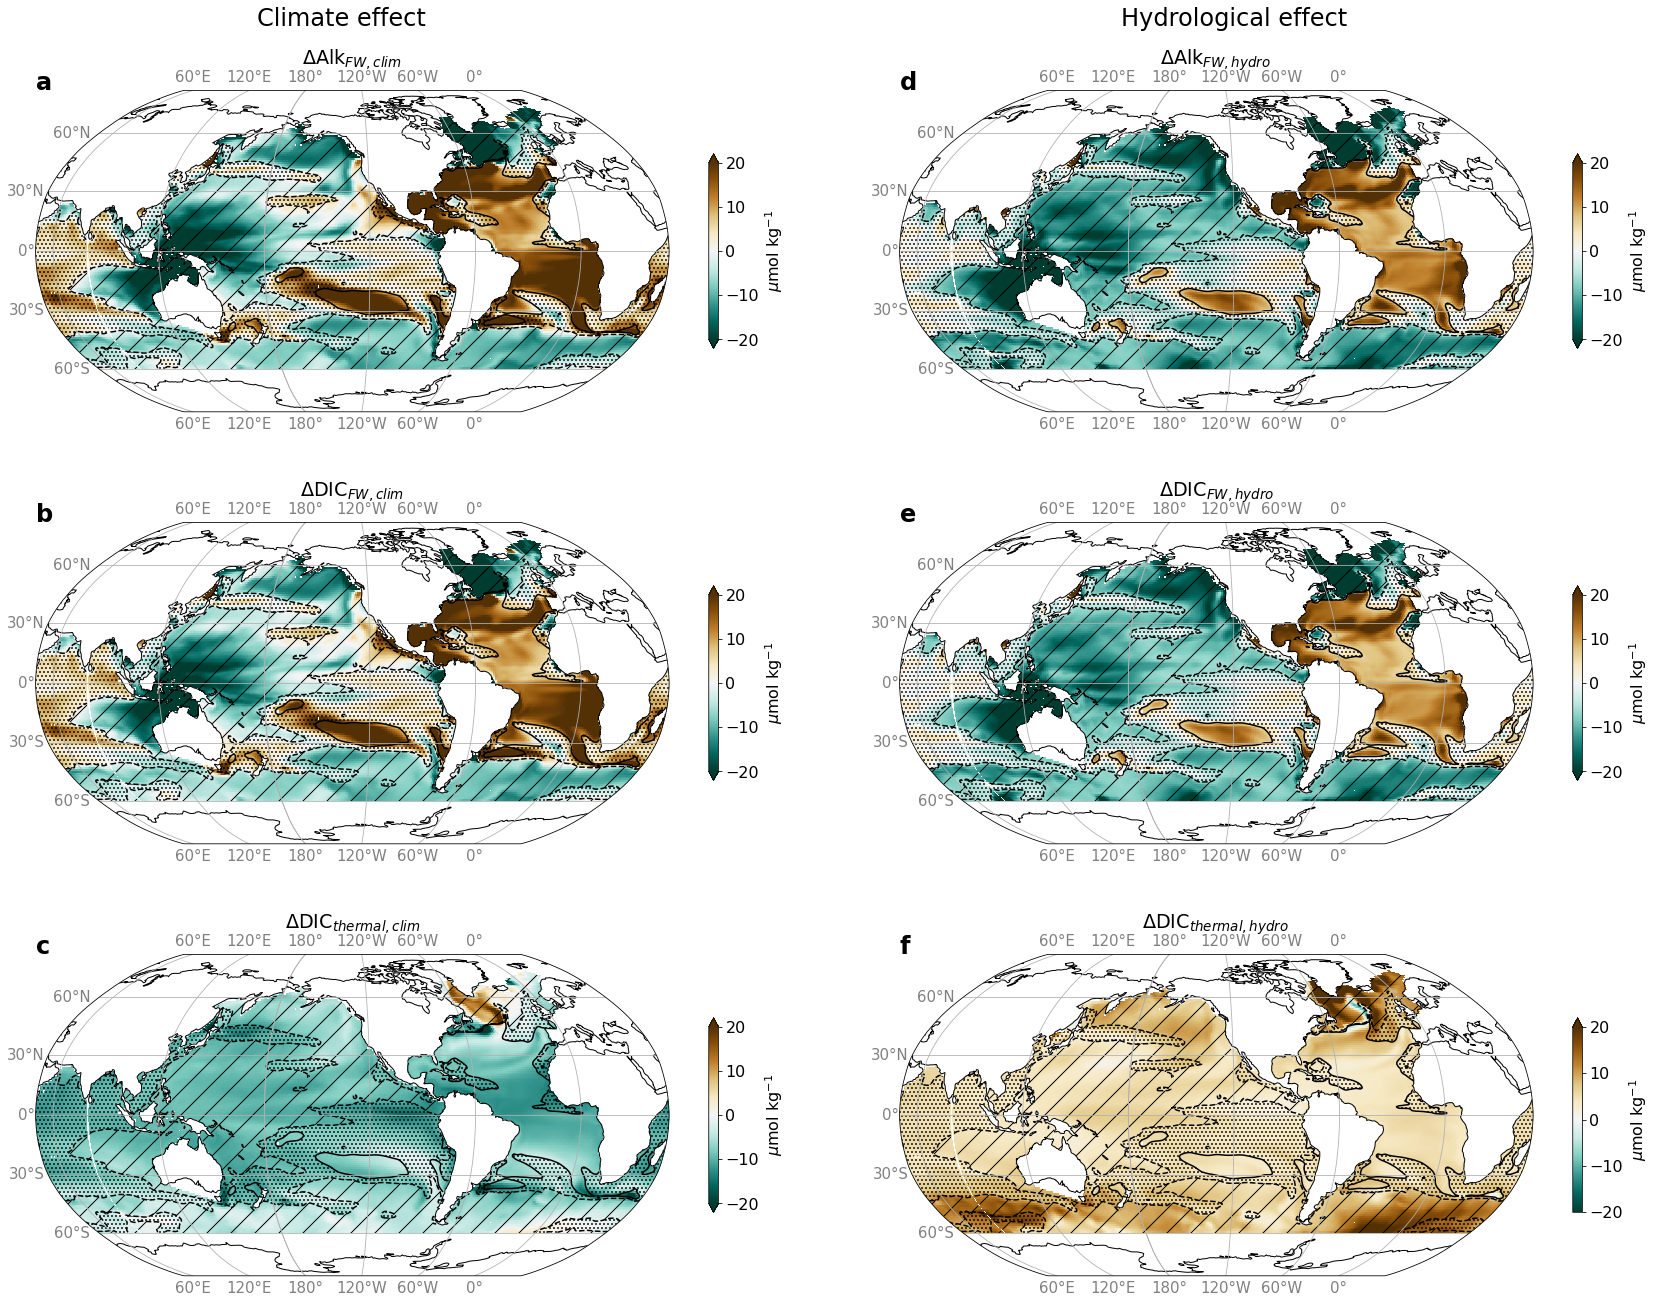

In [20]:

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,1.2,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(ds_frac_clim*alk_fc*1e6).where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax0.set_title('$\Delta$Alk$_{FW, clim}$ ')
ax0.set_global()

ax1 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(ds_frac_clim*dic_fc*1e6).where(alloc==1).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax1, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax1.set_title('$\Delta$DIC$_{FW, clim}$ ')
ax1.set_global()


ax2 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(d_dic_sst_clim).where(alloc==1).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax2, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax2.set_title('$\Delta$DIC$_{thermal, clim}$')
ax2.set_global()

# ----------------------------------
ax3 = fig.add_axes((1.2,1.2,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax3.coastlines()
gl=ax3.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(ds_frac*alk_s*1e6).where(alloc==1).plot(ax=ax3, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax3, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax3.set_title('$\Delta$Alk$_{FW, hydro}$ ')
ax3.set_global()

ax4 = fig.add_axes((1.2,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax4.coastlines()
gl=ax4.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(ds_frac*dic_s*1e6).where(alloc==1).plot(ax=ax4, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax4, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax4, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax4.set_title('$\Delta$DIC$_{FW, hydro}$')
ax4.set_global()


ax5 = fig.add_axes((1.2,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax5.coastlines()
gl=ax5.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(d_dic_sst).where(alloc==1).plot(ax=ax5, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax5, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax5, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax5.set_title('$\Delta$DIC$_{thermal, hydro}$ ')
ax5.set_global()

ax0.text(0,1,'a',fontweight='bold',fontsize=24,transform=ax0.transAxes)
ax1.text(0,1,'b',fontweight='bold',fontsize=24,transform=ax1.transAxes)
ax2.text(0,1,'c',fontweight='bold',fontsize=24,transform=ax2.transAxes)
ax3.text(0,1,'d',fontweight='bold',fontsize=24,transform=ax3.transAxes)
ax4.text(0,1,'e',fontweight='bold',fontsize=24,transform=ax4.transAxes)
ax5.text(0,1,'f',fontweight='bold',fontsize=24,transform=ax5.transAxes)

ax0.text(.35,1.2,'Climate effect',fontsize=24, transform=ax0.transAxes)
ax3.text(.35,1.2,'Hydrological effect',fontsize=24, transform=ax3.transAxes)

fig.savefig('dic_alk_thermal_fw_maps.pdf', format='pdf', dpi=300, bbox_inches='tight')


In [43]:
## HISTORICAL SSS, SST TRENDS
path_to_obs = ''
# # HadISST = 148 years
with xr.open_dataset(path_to_obs+'HadISST/HadISST_sst_196801-201712_trend.nc') as ds:
    sst_obs = ds.sst[0,:] * (2018-1968)*12


with xr.open_dataset(path_to_obs+'reanalyses/reanalysis_sss_1968_2017_linregress.nc') as ds:
    sss0 = ds.slope[:,:,2] * (2018-1968)*12
sss_obs = xr.zeros_like(sss0)
sss_obs[:,0:180] = sss0[:,180:].values
sss_obs[:,180:] = sss0[:,0:180].values
sss_obs['longitude'] = sst_obs.longitude


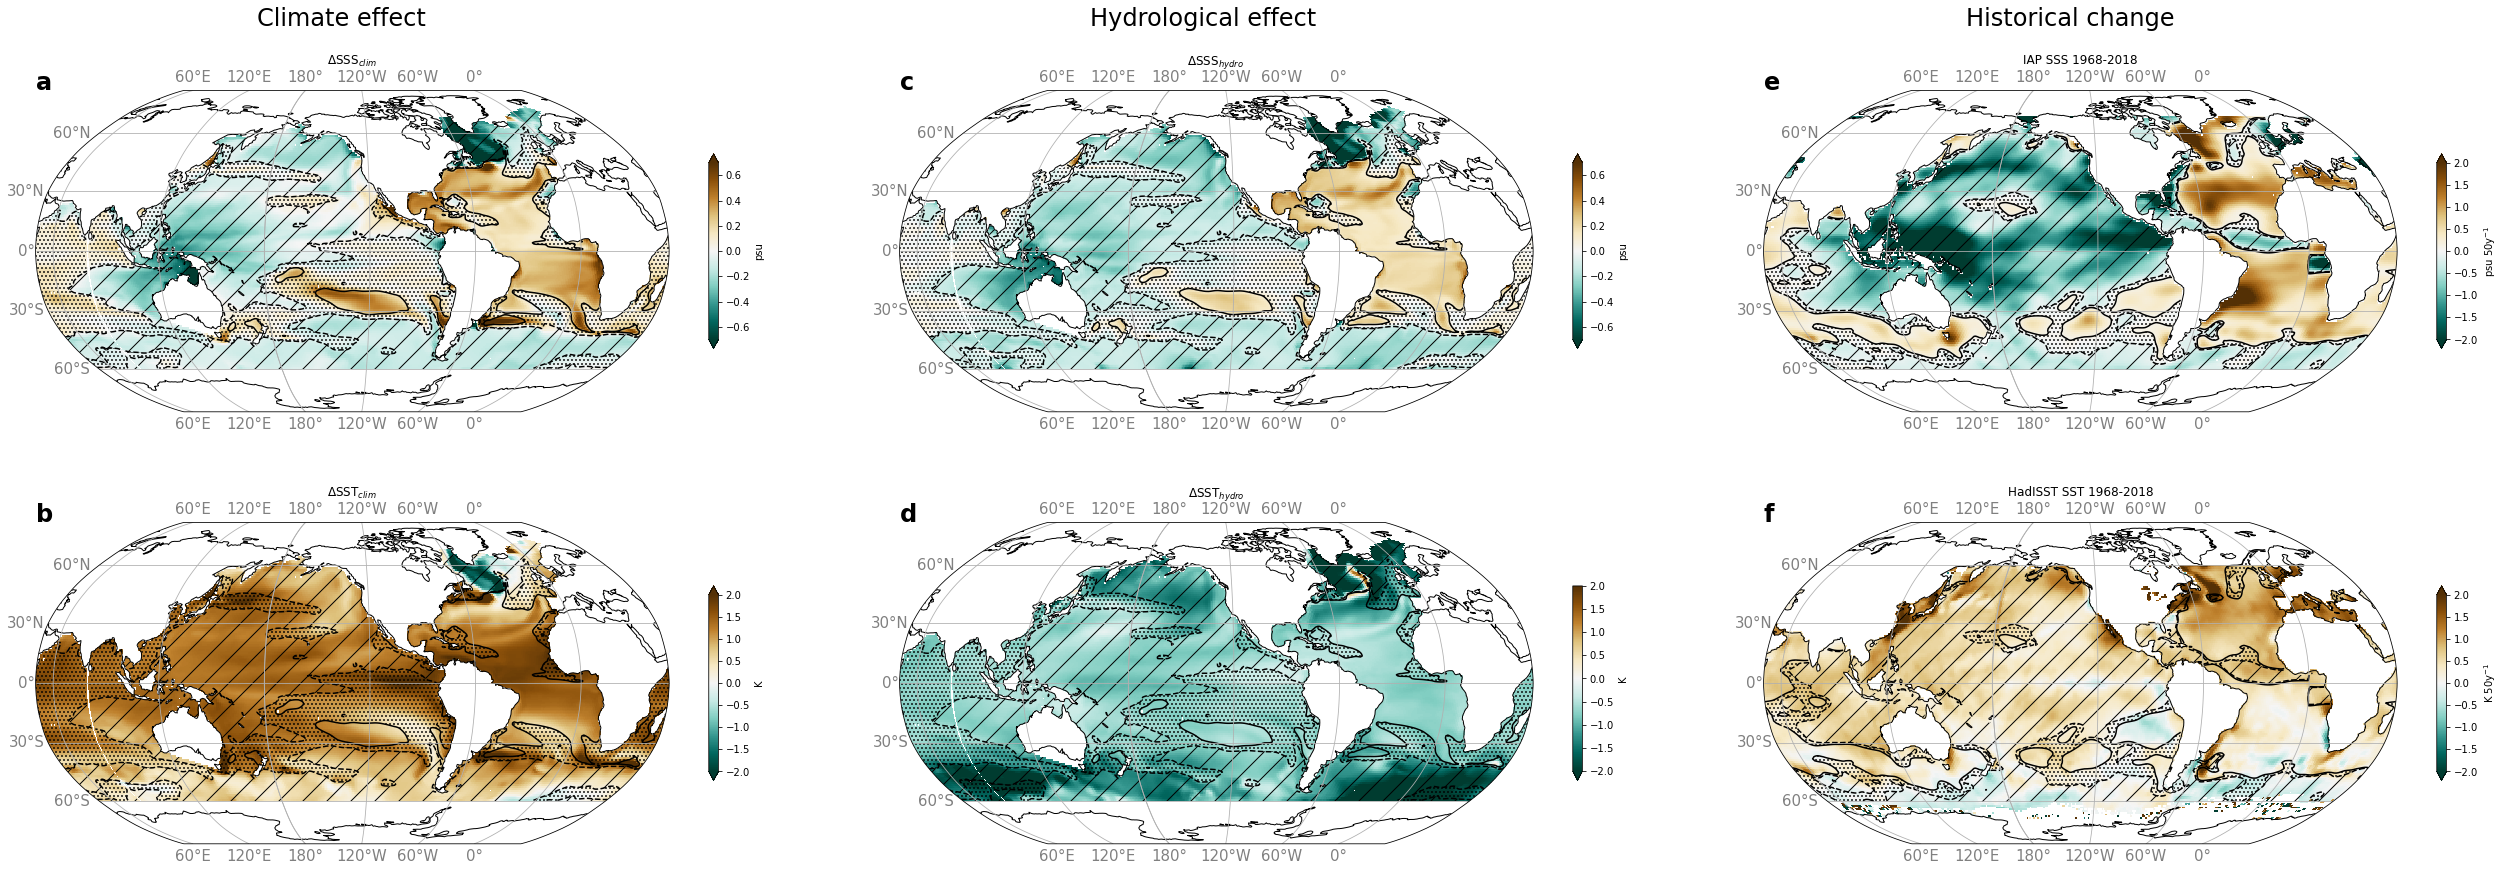

In [50]:

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,1.2,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(sss-sss_fc).where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'psu'},vmin = -.7, vmax = .7, cmap='BrBG_r')
path_to_obs.where(alloc==1).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
path_to_obs.where(alloc==1).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax0.set_title('$\Delta$SSS$_{clim}$ ')
ax0.set_global()

ax1 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(sst-sst_fc).where(alloc==1).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'K'},vmin = -2, vmax = 2, cmap='BrBG_r')
path_to_obs.where(alloc==1).plot.contour(ax=ax1, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
path_to_obs.where(alloc==1).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax1.set_title('$\Delta$SST$_{clim}$ ')
ax1.set_global()

# ----------------------------------
ax3 = fig.add_axes((1.2,1.2,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax3.coastlines()
gl=ax3.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(sss-sss_s)[70:,:].mean('time').where(alloc==1).plot(ax=ax3, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'psu'},vmin = -.7, vmax = .7, cmap='BrBG_r')
path_to_obs.where(alloc==1).plot.contour(ax=ax3, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
path_to_obs.where(alloc==1).plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax3.set_title('$\Delta$SSS$_{hydro}$ ')
ax3.set_global()

ax4 = fig.add_axes((1.2,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax4.coastlines()
gl=ax4.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(sst-sst_s)[70:,:].mean('time').where(alloc==1).plot(ax=ax4, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'K'},vmin = -2, vmax = 2, cmap='BrBG_r')
path_to_obs.where(alloc==1).plot.contour(ax=ax4, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
path_to_obs.where(alloc==1).plot.contourf(ax=ax4, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax4.set_title('$\Delta$SST$_{hydro}$')
ax4.set_global()

# ----------------------------------
ax5 = fig.add_axes((2.4,1.2,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax5.coastlines()
gl=ax5.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
sss_obs[30:-20].plot(ax=ax5, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'psu 50y$^{-1}$'},vmin = -2, vmax = 2, cmap='BrBG_r')
sss_obs[30:-20].plot.contour(ax=ax5, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
sss_obs[30:-20].plot.contourf(ax=ax5, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
ax5.set_title('IAP SSS 1968-2018')
ax5.set_global()

ax6 = fig.add_axes((2.4,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax6.coastlines()
gl=ax6.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
sst_obs.where(np.abs(sst_obs)<5)[30:-20].plot(ax=ax6, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'K 50y$^{-1}$'},vmin = -2, vmax = 2, cmap='BrBG_r')
sss_obs[30:-20].plot.contour(ax=ax6, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
sss_obs[30:-20].plot.contourf(ax=ax6, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
ax6.set_title('HadISST SST 1968-2018')
ax6.set_global()


ax0.text(0,1,'a',fontweight='bold',fontsize=24,transform=ax0.transAxes)
ax1.text(0,1,'b',fontweight='bold',fontsize=24,transform=ax1.transAxes)

ax3.text(0,1,'c',fontweight='bold',fontsize=24,transform=ax3.transAxes)
ax4.text(0,1,'d',fontweight='bold',fontsize=24,transform=ax4.transAxes)

ax5.text(0,1,'e',fontweight='bold',fontsize=24,transform=ax5.transAxes)
ax6.text(0,1,'f',fontweight='bold',fontsize=24,transform=ax6.transAxes)


ax0.text(.35,1.2,'Climate effect',fontsize=24, transform=ax0.transAxes)
ax3.text(.3,1.2,'Hydrological effect',fontsize=24, transform=ax3.transAxes)
ax5.text(.32,1.2,'Historical change',fontsize=24, transform=ax5.transAxes)

fig.savefig('sss_sst.pdf', format='pdf', dpi=300, bbox_inches='tight')


### Averages over salty vs fresh regions

In [5]:
# # GLOBAL
ds_hydro = (sss - sss_s)
area_salty = area.where(ds_hydro>.1).where(alloc==1)
dph_salty       = (pH - pH_s).where(ds_hydro>.1)
dphCLIM_salty       = (pH - pH_fc).where(ds_hydro>.1)
dph_therm_salty = (ph_net_t - ph_fix).where(ds_hydro>.1)
dph_fw_salty    = (ph_dilute - ph_fix).where(ds_hydro>.1)
dphCLIMtherm_salty       = (ph_net_t_clim - ph_fix_clim).where(ds_hydro>.1)
dphCLIMfw_salty       = (ph_dilute_clim - ph_fix_clim).where(ds_hydro>.1)
mean_dph_salty       = (dph_salty*area_salty / area_salty.sum()).sum()
mean_dphCLIM_salty       = (dphCLIM_salty*area_salty / area_salty.sum()).sum()
mean_dph_therm_salty = (dph_therm_salty*area_salty / area_salty.sum()).sum()
mean_dph_fw_salty    = (dph_fw_salty*area_salty / area_salty.sum()).sum()
mean_dphCLIMtherm_salty       = (dphCLIMtherm_salty*area_salty / area_salty.sum()).sum()
mean_dphCLIMfw_salty       = (dphCLIMfw_salty*area_salty / area_salty.sum()).sum()

area_fresh      = area.where(ds_hydro<-.1).where(alloc==1)
dph_fresh       = (pH - pH_s).where(ds_hydro<-.1)
dphCLIM_fresh       = (pH - pH_fc).where(ds_hydro<-.1)
dphCLIMtherm_fresh       = (ph_net_t_clim- ph_fix_clim).where(ds_hydro<-.1)
dphCLIMfw_fresh       = (ph_dilute_clim - ph_fix_clim).where(ds_hydro<-.1)
dph_therm_fresh = (ph_net_t - ph_fix).where(ds_hydro<-.1)
dph_fw_fresh    = (ph_dilute - ph_fix).where(ds_hydro<-.1)
mean_dph_fresh       = (dph_fresh*area_fresh / area_fresh.sum()).sum()
mean_dphCLIM_fresh       = (dphCLIM_fresh*area_fresh / area_fresh.sum()).sum()
mean_dph_therm_fresh = (dph_therm_fresh*area_fresh / area_fresh.sum()).sum()
mean_dph_fw_fresh    = (dph_fw_fresh*area_fresh / area_fresh.sum()).sum()
mean_dphCLIMtherm_fresh       = (dphCLIMtherm_fresh*area_fresh / area_fresh.sum()).sum()
mean_dphCLIMfw_fresh       = (dphCLIMfw_fresh*area_fresh / area_fresh.sum()).sum()


ddic_salty       = ((dic - dic_s)*1e6).where(ds_hydro>.1)
dalk_salty       = ((alk - alk_s)*1e6).where(ds_hydro>.1)
ddicCLIM_salty   = ((dic - dic_fc)*1e6).where(ds_hydro>.1)
dalkCLIM_salty   = ((alk - alk_fc)*1e6).where(ds_hydro>.1)
ddic_sst_salty = (d_dic_sst).where(ds_hydro>.1)
ddic_fw_salty    = (ds_frac*dic_s*1e6).where(ds_hydro>.1)
dalk_fw_salty    = (ds_frac*alk_s*1e6).where(ds_hydro>.1)
ddicCLIM_sst_salty = (d_dic_sst_clim).where(ds_hydro>.1)
ddicCLIM_fw_salty  = (ds_frac_clim*dic_fc*1e6).where(ds_hydro>.1)
dalkCLIM_fw_salty  = (ds_frac_clim*alk_fc*1e6).where(ds_hydro>.1)
# ddicCLIM_flux_salty = ((ddic_dt_flux-ddic_dt_flux_fc)*1e6*.2).where(ds_hydro>.1)

mean_ddic_salty       = (ddic_salty*area_salty / area_salty.sum()).sum()
mean_dalk_salty       = (dalk_salty*area_salty / area_salty.sum()).sum()
mean_ddicCLIM_salty       = (ddicCLIM_salty*area_salty / area_salty.sum()).sum()
mean_dalkCLIM_salty       = (dalkCLIM_salty*area_salty / area_salty.sum()).sum()
mean_ddic_sst_salty = (ddic_sst_salty*area_salty / area_salty.sum()).sum()
mean_ddic_fw_salty    = (ddic_fw_salty*area_salty / area_salty.sum()).sum()
mean_dalk_fw_salty    = (dalk_fw_salty*area_salty / area_salty.sum()).sum()
mean_ddicCLIM_sst_salty = (ddicCLIM_sst_salty*area_salty / area_salty.sum()).sum()
mean_ddicCLIM_fw_salty    = (ddicCLIM_fw_salty*area_salty / area_salty.sum()).sum()
mean_dalkCLIM_fw_salty    = (dalkCLIM_fw_salty*area_salty / area_salty.sum()).sum()
# mean_ddicCLIM_flux_salty = (ddicCLIM_flux_salty*area_salty / area_salty.sum()).sum()

ddic_fresh       = ((dic - dic_s)*1e6).where(ds_hydro<-.1)
dalk_fresh       = ((alk - alk_s)*1e6).where(ds_hydro<-.1)
ddicCLIM_fresh       = ((dic - dic_fc)*1e6).where(ds_hydro<-.1)
dalkCLIM_fresh       = ((alk - alk_fc)*1e6).where(ds_hydro<-.1)
ddic_sst_fresh = (d_dic_sst).where(ds_hydro<-.1)
ddic_fw_fresh    = (ds_frac*dic_s*1e6).where(ds_hydro<-.1)
dalk_fw_fresh    = (ds_frac*alk_s*1e6).where(ds_hydro<-.1)
ddicCLIM_sst_fresh = (d_dic_sst_clim).where(ds_hydro<-.1)
ddicCLIM_fw_fresh    = (ds_frac_clim*dic_fc*1e6).where(ds_hydro<-.1)
dalkCLIM_fw_fresh    = (ds_frac_clim*alk_fc*1e6).where(ds_hydro<-.1)
# ddicCLIM_flux_fresh = ((ddic_dt_flux-ddic_dt_flux_fc)*1e6*.2).where(ds_hydro<-.1)

mean_ddic_fresh       = (ddic_fresh*area_fresh / area_fresh.sum()).sum()
mean_dalk_fresh       = (dalk_fresh*area_fresh / area_fresh.sum()).sum()
mean_ddicCLIM_fresh       = (ddicCLIM_fresh*area_fresh / area_fresh.sum()).sum()
mean_dalkCLIM_fresh       = (dalkCLIM_fresh*area_fresh / area_fresh.sum()).sum()
mean_ddic_sst_fresh = (ddic_sst_fresh*area_fresh / area_fresh.sum()).sum()
mean_ddic_fw_fresh    = (ddic_fw_fresh*area_fresh / area_fresh.sum()).sum()
mean_dalk_fw_fresh    = (dalk_fw_fresh*area_fresh / area_fresh.sum()).sum()
mean_ddicCLIM_sst_fresh = (ddicCLIM_sst_fresh*area_fresh / area_fresh.sum()).sum()
mean_ddicCLIM_fw_fresh    = (ddicCLIM_fw_fresh*area_fresh / area_fresh.sum()).sum()
mean_dalkCLIM_fw_fresh    = (dalkCLIM_fw_fresh*area_fresh / area_fresh.sum()).sum()
# mean_ddicCLIM_flux_fresh = (ddicCLIM_flux_fresh*area_fresh / area_fresh.sum()).sum()


In [ ]:
ddic_fw_salty    = (ds_frac*dic_s*1e6).where(ds_hydro>.1)
dalk_fw_salty    = (ds_frac*alk_s*1e6).where(ds_hydro>.1)

ddicCLIM_fw_salty  = (ds_frac_clim*dic_fc*1e6).where(ds_hydro>.1)
dalkCLIM_fw_salty  = (ds_frac_clim*alk_fc*1e6).where(ds_hydro>.1)

mean_ddic_fw_salty    = (ddic_fw_salty*area_salty / area_salty.sum()).sum()
mean_dalk_fw_salty    = (dalk_fw_salty*area_salty / area_salty.sum()).sum()

mean_ddicCLIM_fw_salty    = (ddicCLIM_fw_salty*area_salty / area_salty.sum()).sum()
mean_dalkCLIM_fw_salty    = (dalkCLIM_fw_salty*area_salty / area_salty.sum()).sum()

# --------------
ddic_fw_fresh    = (ds_frac*dic_s*1e6).where(ds_hydro<-.1)
dalk_fw_fresh    = (ds_frac*alk_s*1e6).where(ds_hydro<-.1)

ddicCLIM_fw_fresh    = (ds_frac_clim*dic_fc*1e6).where(ds_hydro<-.1)
dalkCLIM_fw_fresh    = (ds_frac_clim*alk_fc*1e6).where(ds_hydro<-.1)


mean_ddic_fw_fresh    = (ddic_fw_fresh*area_fresh / area_fresh.sum()).sum()
mean_dalk_fw_fresh    = (dalk_fw_fresh*area_fresh / area_fresh.sum()).sum()

mean_ddicCLIM_fw_fresh    = (ddicCLIM_fw_fresh*area_fresh / area_fresh.sum()).sum()
mean_dalkCLIM_fw_fresh    = (dalkCLIM_fw_fresh*area_fresh / area_fresh.sum()).sum()



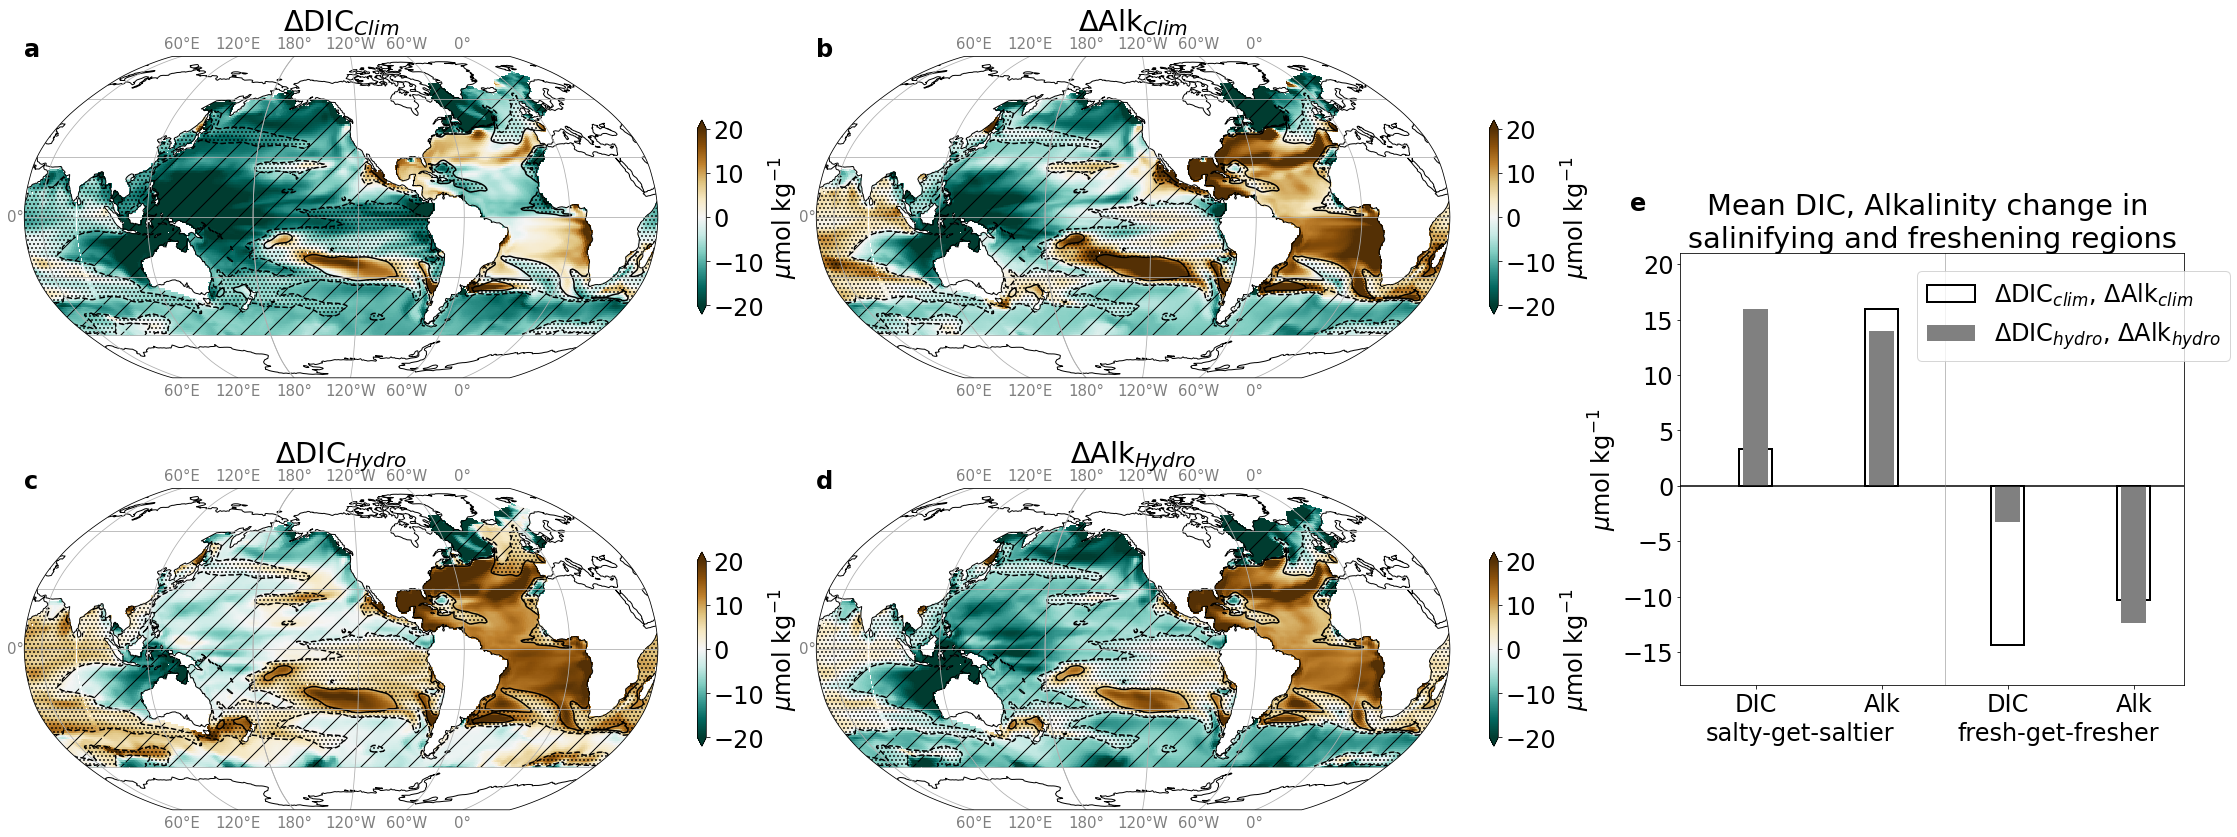

In [43]:
plt.rc('font',size=24)
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(dic*1e6 - dic_fc*1e6).where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax0.set_title('$\Delta$DIC$_{Clim}$')
ax0.set_global()

ax1 = fig.add_axes((1.1,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(alk*1e6 - alk_fc*1e6).where(alloc==1).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax1, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax1.set_title('$\Delta$Alk$_{Clim}$')
ax1.set_global()

ax2 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
(dic*1e6 - dic_s*1e6).where(alloc==1).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax2, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax2.set_title('$\Delta$DIC$_{Hydro}$')
ax2.set_global()

ax3 = fig.add_axes((1.1,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax3.coastlines()
gl=ax3.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(alk*1e6 - alk_s*1e6).where(alloc==1).plot(ax=ax3, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'$\mu$mol kg$^{-1}$'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax3, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# mask_warm_coral.where(mask_warm_coral!=0).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False, colors=['magenta'])
ax3.set_title('$\Delta$Alk$_{Hydro}$')
ax3.set_global()

# -------------------------------------
ax1a = fig.add_axes((2.3,.4,.7,.6),)
ax1a.plot(np.arange(5),np.zeros(5),color='k')
ax1a.bar(1,mean_ddicCLIM_salty, width=.13, edgecolor='k',color='none',linewidth=2,label = '$\Delta$DIC$_{clim}$, $\Delta$Alk$_{clim}$')
ax1a.bar(1.5, mean_dalkCLIM_salty,width=.13, edgecolor='k',color='none',linewidth=2,)
ax1a.bar(2,mean_ddicCLIM_fresh, width=.13, edgecolor='k',color='none',linewidth=2,)
ax1a.bar(2.5, mean_dalkCLIM_fresh,width=.13, edgecolor='k',color='none',linewidth=2,)

ax1a.bar(1,mean_ddic_salty, width=.1, color='grey',label = '$\Delta$DIC$_{hydro}$, $\Delta$Alk$_{hydro}$')
ax1a.bar(1.5, mean_dalk_salty,width=.1, color='grey',)
ax1a.bar(2,mean_ddic_fresh, width=.1, color='grey',)
ax1a.bar(2.5, mean_dalk_fresh,width=.1, color='grey',)
ax1a.axvline(1.75,color='grey',linewidth=.5)

ax1a.set_xlim(.7,2.7)
ax1a.set_ylim(-18,21)
ax1a.set_ylabel('$\mu$mol kg$^{-1}$',)
ax1a.legend(loc=(.47,.75), )
ax1a.set_xticks([1,1.5,2,2.5,],)
ax1a.set_xticklabels(labels=['DIC', 'Alk', 'DIC', 'Alk'], )
ax1a.text(.8,-23,'salty-get-saltier', )
ax1a.text(1.8,-23,'fresh-get-fresher', )
ax1a.set_title('Mean DIC, Alkalinity change in \nsalinifying and freshening regions', )


ax0.text(0,1,'a',fontweight='bold',transform=ax0.transAxes)
ax1.text(0,1,'b',fontweight='bold',transform=ax1.transAxes)
ax2.text(0,1,'c',fontweight='bold',transform=ax2.transAxes)
ax3.text(0,1,'d',fontweight='bold',transform=ax3.transAxes)
ax1a.text(-.1,1.1,'e',fontweight='bold',transform=ax1a.transAxes)

fig.savefig('dic_alk_clim_hydro_maps.pdf', format='pdf', dpi=300, bbox_inches='tight')


In [32]:

plt.rc('font',size=20)
dph_clim = pH - pH_fc
dph_hydro = pH - pH_s

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
dph_clim.where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'}, cmap='BrBG_r', vmin = -.01, vmax = .01,)
(sss - sss_s).where(alloc==1).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
ax0.set_title('$\Delta$pH$_{clim}$')
ax0.set_global()



ax2 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(dph_hydro).where(alloc==1).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax2, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
ax2.set_title('$\Delta$pH$_{hydro}$')
ax2.set_global()


ax3 = fig.add_axes((1.2,.55,.5,.4),)
ax3.plot(np.arange(5),np.zeros(5),color='k')
ax3.bar(1,mean_dphCLIM_salty, width=.13, edgecolor='k',color='none', label = '$\Delta$pH$_{clim}$')
ax3.bar(2, mean_dphCLIM_fresh,width=.13, edgecolor='k',color='none')
ax3.bar(1,mean_dph_salty, width=.1, color='grey', label = '$\Delta$pH$_{hydro}$')
ax3.bar(2,mean_dph_fresh, width=.1, color='grey',)

ax3.axvline(1.5,color='k')
ax3.set_xlim(.5,2.5)
ax3.set_ylim(-.0035,.0024)
ax3.set_xticks([1,2])
ax3.label()
ax3.set_xticklabels(['salty-get-saltier', 'fresh-get-fresher'])
ax3.set_title('Mean pH change in salinifying \nand freshening regions')


ax0.text(0,1,'a',fontweight='bold',fontsize=24,transform=ax0.transAxes)
ax2.text(0,1,'b',fontweight='bold',fontsize=24,transform=ax2.transAxes)

ax3.text(-.1,1.1,'c',fontweight='bold',fontsize=24,transform=ax3.transAxes)


fig.savefig('ph_clim_hydro.pdf',format='pdf',dpi=300,bbox_inches='tight')


ValueError: setting an array element with a sequence.

Error in callback <function _draw_all_if_interactive at 0x7fd971551f70> (for post_execute):


AttributeError: 'GeoAxes' object has no attribute '_autoscaleXon'

AttributeError: 'GeoAxes' object has no attribute '_autoscaleXon'

<Figure size 1000x1000 with 1 Axes>

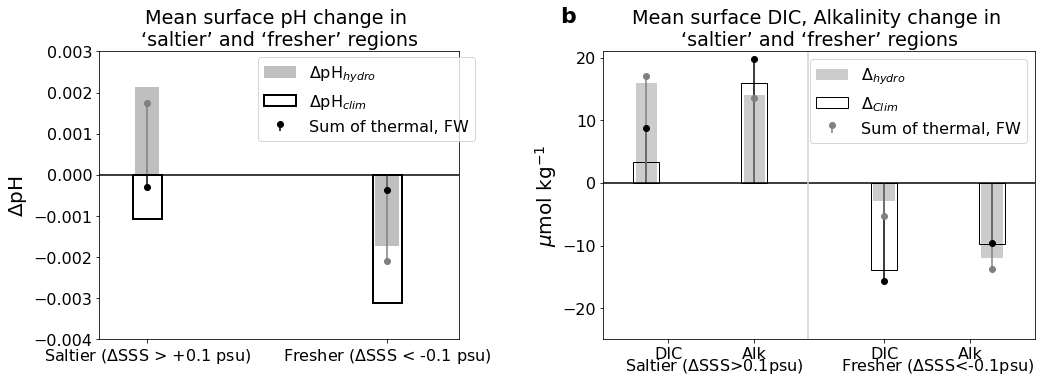

In [172]:
plt.rc('font',size=16)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes((0,0,.5,.4),)
ax1.plot(np.arange(8),np.zeros(8),color='k')

ax1.bar(1,mean_dph_salty,color='grey',width=.1,alpha=.5,label='$\Delta$pH$_{hydro}$')
ax1.bar(1,mean_dphCLIM_salty,edgecolor='k',color='none', width=.12, linewidth=2, label='$\Delta$pH$_{clim}$')
ax1.stem(1, mean_dphCLIMtherm_salty+mean_dphCLIMfw_salty,linefmt='k',markerfmt='ok',basefmt='none',label = 'Sum of thermal, FW')
(markers, stemlines, baseline) = ax1.stem(1,mean_dph_therm_salty+mean_dph_fw_salty,linefmt='grey',basefmt='none',)
plt.setp(markers, marker='o', color="grey", )

ax1.bar(2,mean_dph_fresh,color='grey',alpha=.5,width=.1)
ax1.bar(2,mean_dphCLIM_fresh,edgecolor='k', linewidth=2, color='none', width=.12)
ax1.stem(2, mean_dphCLIMtherm_fresh+mean_dphCLIMfw_fresh,linefmt='k',markerfmt='ok',)
(markers, stemlines, baseline) = ax1.stem(2,mean_dph_therm_fresh+mean_dph_fw_fresh,linefmt='grey',markerfmt='grey',)
plt.setp(markers, marker='o', color="grey", )

ax1.legend(loc=(.44,.69))
ax1.set_xlim(.8,2.3)
ax1.set_ylim(-0.004,0.003)
ax1.set_ylabel('$\Delta$pH',fontsize=20)
ax1.set_xticks([1,2],)
ax1.set_xticklabels(labels=['Saltier ($\Delta$SSS > +0.1 psu)','Fresher ($\Delta$SSS < -0.1 psu)'])

ax1.set_title('Mean surface pH change in \n‘saltier’ and ‘fresher’ regions')

ax2 = fig.add_axes((.7,0,.6,.4),)
ax2.plot(np.arange(5),np.zeros(5),color='k')

ax2.bar(1,mean_ddic_salty,color='grey',width=.1,alpha=.4,label = '$\Delta_{hydro}$')
ax2.bar(1,mean_ddicCLIM_salty,edgecolor='k',color='none',width=.12,label = '$\Delta_{Clim}$')
ax2.stem(1,mean_ddicCLIM_sst_salty+mean_ddicCLIM_fw_salty,linefmt='k',markerfmt='ok',basefmt='none',)
(markers, stemlines, baseline) = ax2.stem(1,mean_ddic_sst_salty+mean_ddic_fw_salty,linefmt='grey',basefmt='none',label='Sum of thermal, FW')
plt.setp(markers, marker='o', color="grey", )

ax2.bar(1.5,mean_dalk_salty,color='grey',width=.1,alpha=.4)
ax2.bar(1.5,mean_dalkCLIM_salty,edgecolor='k',color='none',width=.12)
ax2.stem(1.5,mean_dalkCLIM_fw_salty ,linefmt='k',markerfmt='ok',)
(markers, stemlines, baseline) = ax2.stem(1.5,mean_dalk_fw_salty,linefmt='grey',)
plt.setp(markers, marker='o', color="grey", )

ax2.bar(2.1,mean_ddic_fresh,color='grey',width=.1,alpha=.4)
ax2.bar(2.1,mean_ddicCLIM_fresh,edgecolor='k',color='none',width=.12)
ax2.stem(2.1, mean_ddicCLIM_sst_fresh+mean_ddicCLIM_fw_fresh,linefmt='k',markerfmt='ok',)
(markers, stemlines, baseline) = ax2.stem(2.1,mean_ddic_sst_fresh+mean_ddic_fw_fresh,linefmt='grey',)
plt.setp(markers, marker='o', color="grey", )

ax2.bar(2.6,mean_dalk_fresh,color='grey',width=.1,alpha=.4)
ax2.bar(2.6,mean_dalkCLIM_fresh,edgecolor='k',color='none',width=.12)
ax2.stem(2.6, mean_dalkCLIM_fw_fresh,linefmt='k',markerfmt='ok',)
(markers, stemlines, baseline) = ax2.stem(2.6,mean_dalk_fw_fresh,linefmt='grey',)
plt.setp(markers, marker='o', color="grey", )


ax2.set_xlim(.8,2.8)
ax2.set_ylim(-25,21)
ax2.set_ylabel('$\mu$mol kg$^{-1}$',fontsize=20)
ax2.legend()
ax2.set_xticks([1.1,1.5,2.1,2.5],)
ax2.set_xticklabels(labels=['DIC','Alk','DIC','Alk'])
ax2.text(.9,-30,'Saltier ($\Delta$SSS>0.1psu)')
ax2.text(1.9,-30,'Fresher ($\Delta$SSS<-0.1psu)')
ax2.axvline(1.75,color='lightgrey')
ax2.text(-.1,1.1,'b',fontweight='bold',fontsize=22, transform=ax2.transAxes)
ax2.set_title('Mean surface DIC, Alkalinity change in \n‘saltier’ and ‘fresher’ regions')

fig.savefig('ph_dic_saltier_fresher_validation.pdf', format='pdf',dpi=300, bbox_inches='tight')


Text(0, 0.5, '$\\Delta$pH')

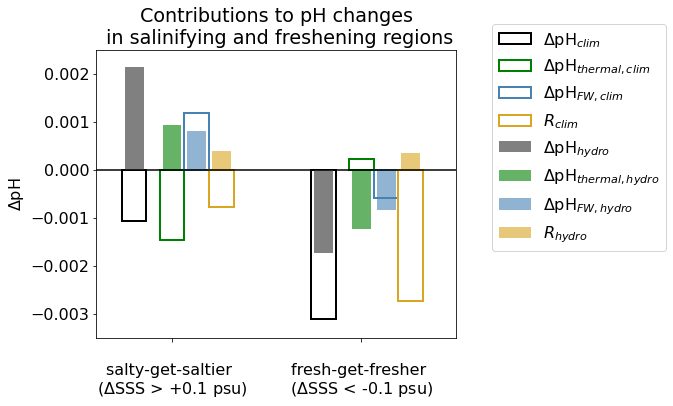

In [202]:
plt.rc('font',size=16)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes((0,0,.5,.4),)
ax1.plot(np.arange(8),np.zeros(8),color='k',)

ax1.bar(1,mean_dphCLIM_salty,edgecolor='k',width=.13, color='none',linewidth=2, label = '$\Delta$pH$_{clim}$')
ax1.bar(1.2,  mean_dphCLIMtherm_salty,width=.13, edgecolor='g', color='none',linewidth=2, label = '$\Delta$pH$_{thermal, clim}$')
ax1.bar(1.33,mean_dphCLIMfw_salty, width=.13, edgecolor='steelblue', color='none', linewidth=2,label = '$\Delta$pH$_{FW, clim}$')
ax1.bar(1.46,mean_dphCLIM_salty - (mean_dphCLIMfw_salty+mean_dphCLIMtherm_salty), width=.13, linewidth=2,edgecolor='goldenrod', color='none', label = '$R_{clim}$')

ax1.bar(2,mean_dphCLIM_fresh,edgecolor='k',width=.13,linewidth=2, color='none')
ax1.bar(2.2,mean_dphCLIMtherm_fresh,width=.13, edgecolor='g',linewidth=2,color='none')
ax1.bar(2.33,mean_dphCLIMfw_fresh,width=.13,edgecolor='steelblue',linewidth=2,color='none')
ax1.bar(2.46,mean_dphCLIM_fresh - (mean_dphCLIMfw_fresh+mean_dphCLIMtherm_fresh), width=.13, linewidth=2,edgecolor='goldenrod', color='none',)

## --------------------------------------------------------------------------------------
ax1.bar(1,mean_dph_salty,color='grey',width=.1,  label = '$\Delta$pH$_{hydro}$')
ax1.bar(1.2,  mean_dph_therm_salty,width=.1, color='g',alpha=.6, label = '$\Delta$pH$_{thermal,hydro}$')
ax1.bar(1.33,mean_dph_fw_salty, width=.1, color='steelblue',alpha=.6, label = '$\Delta$pH$_{FW,hydro}$')
ax1.bar(1.46,mean_dph_salty - (mean_dph_fw_salty+mean_dph_therm_salty), width=.1, color='goldenrod',alpha=.6, label = '$R_{hydro}$')


ax1.bar(2,mean_dph_fresh,color='grey',width=.1, )
ax1.bar(2.2,mean_dph_therm_fresh,width=.1, color='g',alpha=.6 )
ax1.bar(2.33,mean_dph_fw_fresh,width=.1, color='steelblue',alpha=.6)
ax1.bar(2.46,mean_dph_fresh - (mean_dph_fw_fresh+mean_dph_therm_fresh), width=.1, color='goldenrod',alpha=.6, )


ax1.set_title('Contributions to pH changes\n in salinifying and freshening regions')
ax1.legend(loc=(1.1,.3))
ax1.set_xlim(.8,2.7)
ax1.set_ylim(-0.0035,0.0025)
ax1.set_xticks([1.2,2.2])
ax1.set_xticklabels(labels=['\nsalty-get-saltier \n($\Delta$SSS > +0.1 psu)','\nfresh-get-fresher \n($\Delta$SSS < -0.1 psu)'])
ax1.set_ylabel('$\Delta$pH')


In [24]:
mean_ddicCLIM_fw_salty.load()
mean_ddicCLIM_sst_salty.load()
mean_ddic_fw_salty.load()
mean_ddic_sst_salty.load()
mean_dalkCLIM_fw_salty.load()
mean_dalk_fw_salty.load()
mean_ddicCLIM_fw_fresh.load()
mean_ddicCLIM_sst_fresh.load()
mean_ddic_fw_fresh.load()
mean_ddic_sst_fresh.load()
mean_dalkCLIM_fw_fresh.load()
mean_dalk_fw_fresh.load()

<xarray.DataArray ()>
array(-13.78255362)
Coordinates:
    st_ocean  float64 5.0
    time      object 0101-01-16 12:00:00

/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/ar

Text(0.5, 1.0, 'Contributions to $\\Delta$Alk, $\\Delta$DIC\n in salinifying and freshening regions')

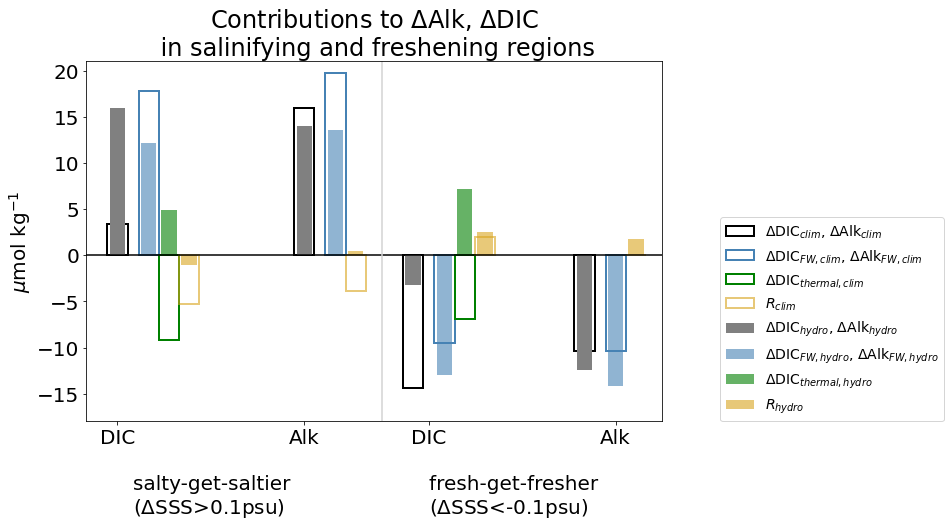

In [9]:
plt.rc('font',size=20)
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_axes((0,0,.8,.5),)
ax1.plot(np.arange(-2,5),np.zeros(7),color='k')

ax1.bar(0,mean_ddicCLIM_salty, width=.13, edgecolor='k',color='none', linewidth=2,label = '$\Delta$DIC$_{clim}$, $\Delta$Alk$_{clim}$')
ax1.bar(.2, mean_ddicCLIM_fw_salty,width=.13, edgecolor='steelblue',color='none', linewidth=2, label = '$\Delta$DIC$_{FW,clim}$, $\Delta$Alk$_{FW,clim}$')
ax1.bar(.33,mean_ddicCLIM_sst_salty, width=.13, edgecolor='g',color='none', linewidth=2, label = '$\Delta$DIC$_{thermal,clim}$')
ax1.bar(.46,mean_ddicCLIM_salty - (mean_ddicCLIM_sst_salty+mean_ddicCLIM_fw_salty), width=.13,edgecolor='goldenrod',alpha=.6, linewidth=2, color='none', label = '$R_{clim}$')

ax1.bar(1.2, mean_dalkCLIM_salty,width=.13, edgecolor='k',color='none', linewidth=2)
ax1.bar(1.4, mean_dalkCLIM_fw_salty,width=.13, edgecolor='steelblue',color='none', linewidth=2)
ax1.bar(1.53, mean_dalkCLIM_salty-mean_dalkCLIM_fw_salty,width=.13,edgecolor='goldenrod',alpha=.6, color='none', linewidth=2)

ax1.bar(1.9,mean_ddicCLIM_fresh, width=.13, edgecolor='k',color='none', linewidth=2)
ax1.bar(2.1, mean_ddicCLIM_fw_fresh,width=.13, edgecolor='steelblue',color='none', linewidth=2)
ax1.bar(2.23,mean_ddicCLIM_sst_fresh, width=.13,edgecolor='g',color='none', linewidth=2)
ax1.bar(2.36,mean_ddicCLIM_fresh - (mean_ddicCLIM_sst_fresh+mean_ddicCLIM_fw_fresh), width=.13, edgecolor='goldenrod',alpha=.6, color='none', linewidth=2)

ax1.bar(3, mean_dalkCLIM_fresh,width=.13, edgecolor='k',color='none', linewidth=2, ), 
ax1.bar(3.2, mean_dalkCLIM_fw_fresh,width=.13, edgecolor='steelblue',color='none', linewidth=2)
ax1.bar(3.33, mean_dalkCLIM_fresh - mean_dalkCLIM_fw_fresh,width=.13,edgecolor='goldenrod',alpha=.6, color='none', linewidth=2)




# ----------------------------------------------

ax1.bar(0,mean_ddic_salty, width=.1, color='grey',label = '$\Delta$DIC$_{hydro}$, $\Delta$Alk$_{hydro}$')
ax1.bar(.2, mean_ddic_fw_salty,width=.1, color='steelblue',alpha=.6,label = '$\Delta$DIC$_{FW,hydro}$, $\Delta$Alk$_{FW,hydro}$')
ax1.bar(.33,mean_ddic_sst_salty, width=.1, color='g',alpha=.6,label = '$\Delta$DIC$_{thermal,hydro}$')
ax1.bar(.46,mean_ddic_salty - (mean_ddic_sst_salty+mean_ddic_fw_salty), width=.1, color='goldenrod',alpha=.6, label = '$R_{hydro}$')

ax1.bar(1.2, mean_dalk_salty,width=.1, color='grey',)
ax1.bar(1.4, mean_dalk_fw_salty,width=.1, color='steelblue',alpha=.6)
ax1.bar(1.53, mean_dalk_salty-mean_dalk_fw_salty,width=.1,color='goldenrod',alpha=.6)


ax1.bar(1.9,mean_ddic_fresh, width=.1, color='grey')
ax1.bar(2.1, mean_ddic_fw_fresh,width=.1, color='steelblue',alpha=.6)
ax1.bar(2.23,mean_ddic_sst_fresh, width=.1, color='g',alpha=.6)
ax1.bar(2.36,mean_ddic_fresh - (mean_ddic_sst_fresh+mean_ddic_fw_fresh), width=.1, color='goldenrod',alpha=.6)

ax1.bar(3, mean_dalk_fresh,width=.1, color='grey', ), 
ax1.bar(3.2, mean_dalk_fw_fresh,width=.1, color='steelblue',alpha=.6)
ax1.bar(3.33, mean_dalk_fresh - mean_dalk_fw_fresh,width=.1,color='goldenrod',alpha=.6)

ax1.legend(fontsize=14, loc =(1.1,.0))
ax1.set_xlim(-.2,3.5)
ax1.set_ylim(-18,21)
ax1.set_ylabel('$\mu$mol kg$^{-1}$',fontsize=20)
ax1.set_xticks([0,1.2,2,3.2],)
ax1.set_xticklabels(labels=['DIC','Alk','DIC','Alk'])
ax1.text(.1,-28,'salty-get-saltier \n($\Delta$SSS>0.1psu)')
ax1.text(2,-28,'fresh-get-fresher \n($\Delta$SSS<-0.1psu)')
ax1.axvline(1.7,color='lightgrey')
# ax1.text(-.1,1.1,'a',fontweight='bold',fontsize=22, transform=ax1.transAxes)
ax1.set_title('Contributions to $\Delta$Alk, $\Delta$DIC\n in salinifying and freshening regions')


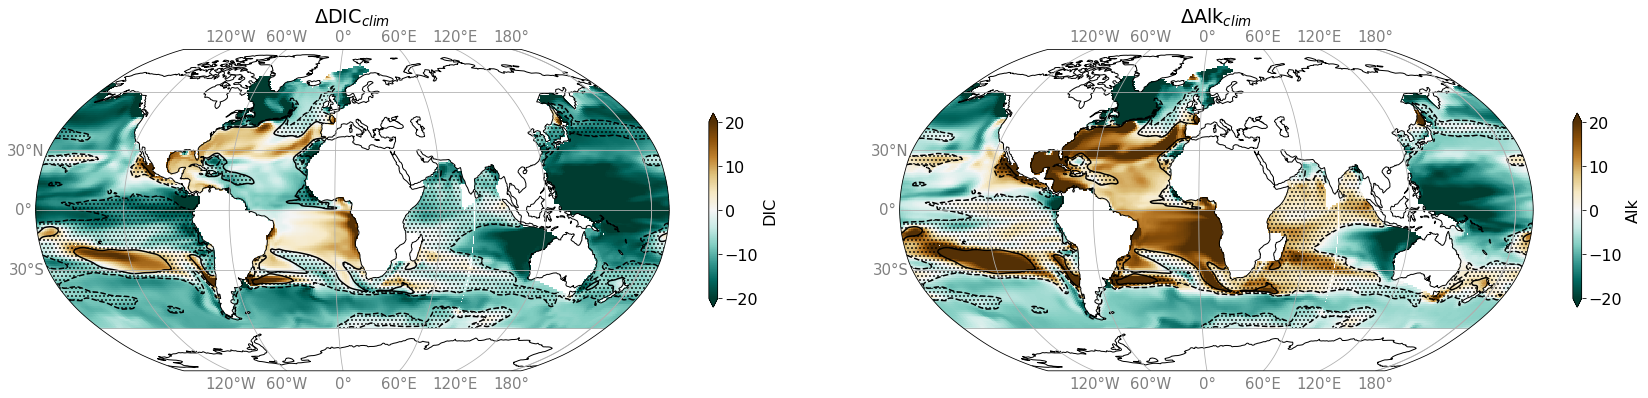

In [54]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

((dic-dic_fc)*1e6).where(alloc==1).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'DIC'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax1, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)
ax1.set_title('$\Delta$DIC$_{clim}$ ')
ax1.set_global()


ax2 = fig.add_axes((1.2,0,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

((alk-alk_fc)*1e6).where(alloc==1).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'Alk'},vmin = -20, vmax = 20, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax2, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)
ax2.set_title('$\Delta$Alk$_{clim}$ ')
ax2.set_global()




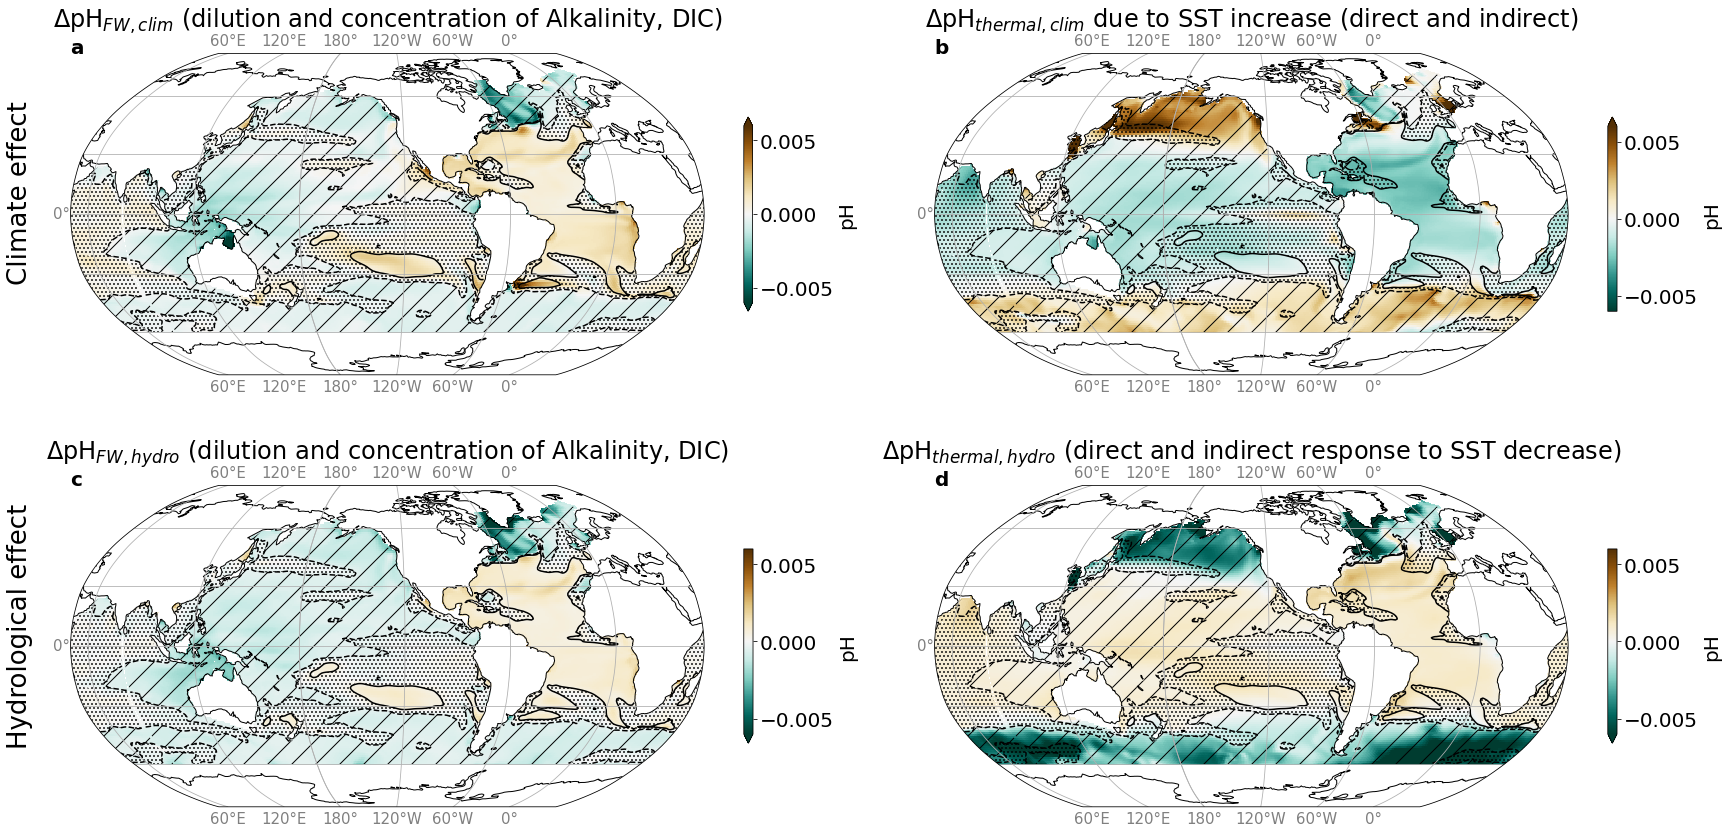

In [52]:


import cartopy.crs as ccrs
import cartopy
# dsss_hydro = s[70:,25:-20,:].mean('time') - s_s[70:,:].mean('time')
# dsst_hydro = t[70:,25:-20,:].mean('time') - t_s[70:,:].mean('time')
# dph_hydro = pH[70:,25:-20,:].mean('time') - pH_s[70:,:].mean('time')
# dph_hydro_sign = (dph_hydro*0-1).where(dph_hydro<0,other=1).where(~np.isnan(dph_hydro))


# --------------------------------------------------------------------
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(ph_dilute - ph_fix).where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.006, vmax = .006, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# fw_signagreement = (ph_dilute - ph_fix) * dsss_hydro
# fw_signagreement.plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), levels=[-10,0,10],colors='none',hatches=['...',''],add_colorbar=False)


ax0.set_title('$\Delta$pH$_{FW, hydro}$ (dilution and concentration of Alkalinity, DIC)')
ax0.set_global()
# # -------------------------

ax1 = fig.add_axes((1.2,0,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}


(ph_net_t - ph_fix).where(alloc==1).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.006, vmax = .006, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax1, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)
# t_signagreement = (ph_net_t - ph_fix) * dsst_hydro
# t_signagreement.plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), levels=[-10,0,10],colors='none',hatches=['','\\',],add_colorbar=False)


ax1.set_title('$\Delta$pH$_{thermal, hydro}$ (direct and indirect response to SST decrease)')
ax1.set_global()

# # -------------------------
ax2 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(ph_dilute_clim - ph_fix_clim).where(alloc==1).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.006, vmax = .006, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax2, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)

ax2.set_title('$\Delta$pH$_{FW, clim}$ (dilution and concentration of Alkalinity, DIC)')
ax2.set_global()
# # -------------------------

ax3 = fig.add_axes((1.2,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=230))
ax3.coastlines()
gl=ax3.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}


(ph_net_t_clim - ph_fix_clim).where(alloc==1).plot(ax=ax3, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.006, vmax = .006, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax3, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['/','...',''], add_colorbar=False)

ax3.set_title('$\Delta$pH$_{thermal, clim}$ due to SST increase (direct and indirect)')
ax3.set_global()


ax0.text(0,1,'c',fontweight='bold',transform=ax0.transAxes, fontsize=20)
ax1.text(0,1,'d',fontweight='bold',transform=ax1.transAxes, fontsize=20)
ax0.text(-.1,.2,'Hydrological effect',transform=ax0.transAxes, fontsize=26, rotation=90)

ax2.text(0,1,'a',fontweight='bold',transform=ax2.transAxes, fontsize=20)
ax3.text(0,1,'b',fontweight='bold',transform=ax3.transAxes, fontsize=20)
ax2.text(-.1,.3,'Climate effect',transform=ax2.transAxes, fontsize=26, rotation=90)

fig.savefig('ph_thermal_fw_maps.pdf', format='pdf', dpi=300, bbox_inches='tight')


Text(0, 1, 'b')

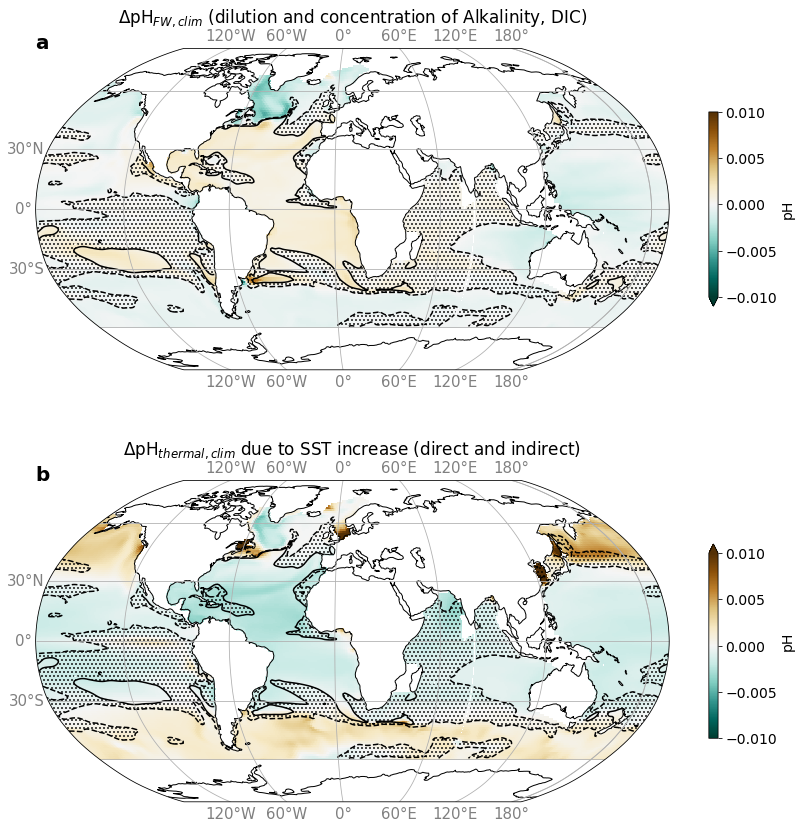

In [11]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,1.2,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

(ph_dilute_clim - ph_fix_clim).where(alloc==1).plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax0, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)

ax0.set_title('$\Delta$pH$_{FW, clim}$ (dilution and concentration of Alkalinity, DIC)')
ax0.set_global()
# # -------------------------

ax1 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}


(ph_net_t_clim - ph_fix_clim).where(alloc==1).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.01, vmax = .01, cmap='BrBG_r')
(sss - sss_s).where(alloc==1).plot.contour(ax=ax1, transform=ccrs.PlateCarree(),levels = [-.1,.1],colors='k')
(sss - sss_s).where(alloc==1).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels = [-100,-.1,.1,100],colors='none',hatches=['','...',''], add_colorbar=False)

ax1.set_title('$\Delta$pH$_{thermal, clim}$ due to SST increase (direct and indirect)')
ax1.set_global()

ax0.text(0,1,'a',fontweight='bold',transform=ax0.transAxes, fontsize=20)
ax1.text(0,1,'b',fontweight='bold',transform=ax1.transAxes, fontsize=20)


In [ ]:
(ph_net_t - ph_fix).where(dsss_hydro<0)
(ph_dilute - ph_fix).where(dsss_hydro<0)

(ph_net_t - ph_fix).where(dsss_hydro>0)
(ph_dilute - ph_fix).where(dsss_hydro>0) # # ARROWS???


/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/hogikyan/anaconda3/envs/myenv_akh/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0, 1, 'b')

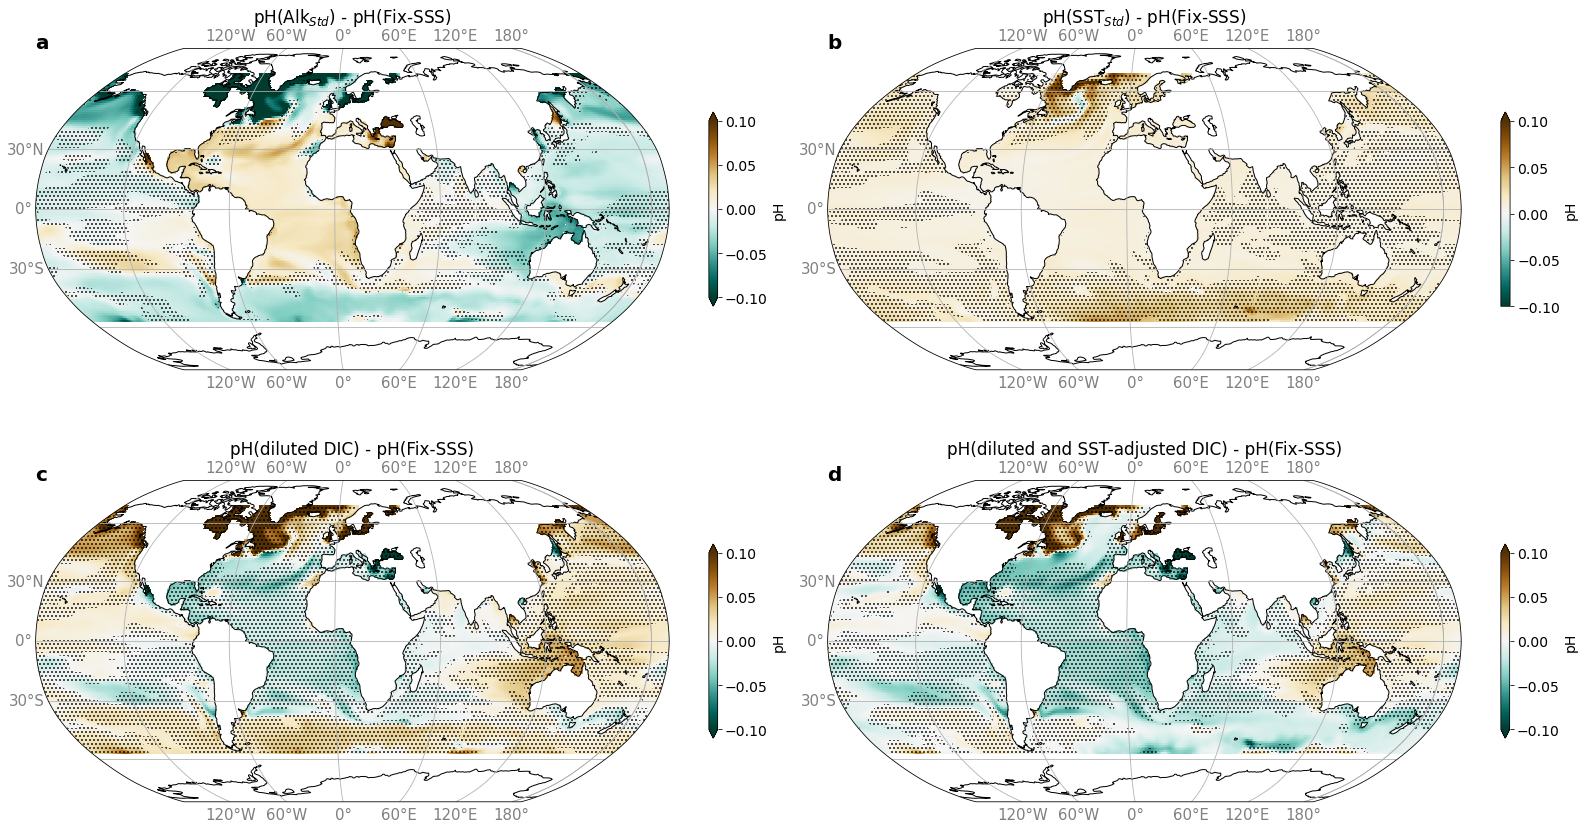

In [50]:

# # # A GIVEN % CHANGE IN ALK WILL BE A GREATER UMOL/KG CHANGE DUE TO HIGHER MEAN CONCENTRATION
# # # where both decrease, pH  increases (weakened alk buffering)
# # # where both increase, pH  decreases (alk buffers)
# accounted = ph_dilutealk + ph_dilutedic_tdic + ph_t - 3 * ph_fix # predicted delta-hydro
# accounted = ph_dilutealk + ph_dilutedic - 2 * ph_fix   # predicted delta-hydro

# accounted[20:-10,:].plot(aspect = 2, size= 4,vmin = -.01, vmax = .01,cmap = 'RdBu_r')
# plt.title('pH(diluted Alk + diluted  DIC) - pH(fix-SSS)')

# # # higher DIC solubility at lower temperatures leads to strong pH decrease
# # # temperature decrease alone would lead to strong pH increase
# # # including both effects leads to more moderate increase as visualized here

# d_ph_hydroA = ph_std_sys - ph_fix
# d_ph_hydroA[20:-10,:].plot(aspect = 2, size= 4,vmin = -.01, vmax = .01,cmap = 'RdBu_r')
# plt.title('pH(std) - pH(fix-SSS), from co2sys')

# d_ph_hydro = pH - pH_s
# d_ph_hydro[20:-10,:].plot(aspect = 2, size= 4,vmin = -.01, vmax = .01,cmap = 'RdBu_r')
# plt.title('dpH_hydro')


import cartopy.crs as ccrs
import cartopy

# dph_hydro = pH[70:,25:-20,:].mean('time') - pH_s[70:,:].mean('time')
# dph_hydro_sign = (dph_hydro*0-1).where(dph_hydro<0,other=1).where(~np.isnan(dph_hydro))

# --------------------------------------------------------------------
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_axes((0,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax0.coastlines()
gl=ax0.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

dalk_dilute = (ph_dilutealk - ph_fix)[25:-20,:]
dalk_dilute_sign = (dalk_dilute*0-1).where(dalk_dilute<0,other=1).where(~np.isnan(dalk_dilute))

dalk_dilute.plot(ax=ax0, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.1, vmax = .1, cmap='BrBG_r')
(dph_hydro_sign * dalk_dilute_sign).plot.contourf(ax=ax0, transform=ccrs.PlateCarree(), levels = [-10,0,10], hatches = ['...',''], colors='none', add_colorbar=False)
ax0.set_title('pH(Alk$_{Std}$) - pH(Fix-SSS)')
ax0.set_global()

# --------------------------------------------------------------------
ddic_dilute = (ph_dilutedic - ph_fix)[25:-20,:]
ddic_dilute_sign = (ddic_dilute*0-1).where(ddic_dilute<0,other=1).where(~np.isnan(ddic_dilute))

ax1 = fig.add_axes((0,0,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax1.coastlines()
gl=ax1.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

ddic_dilute.plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.1, vmax = .1, cmap='BrBG_r')
(dph_hydro_sign * ddic_dilute_sign).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), levels = [-10,0,10], hatches = ['...',''], colors='none', add_colorbar=False)
ax1.set_title('pH(diluted DIC) - pH(Fix-SSS)')
ax1.set_global()

# --------------------------------------------------------------------
ddic_dilutet = (ph_dilutedic_tdic - ph_fix)[25:-20,:]
ddic_dilutet_sign = (ddic_dilutet*0-1).where(ddic_dilutet<0,other=1).where(~np.isnan(ddic_dilutet))

ax2 = fig.add_axes((1.1,0,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax2.coastlines()
gl=ax2.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
d_ph_sst = ph_t - ph_fix

ddic_dilutet.plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.1, vmax = .1, cmap='BrBG_r')
(dph_hydro_sign * ddic_dilutet_sign).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(), levels = [-10,0,10], hatches = ['...',''], colors='none', add_colorbar=False)
ax2.set_title('pH(diluted and SST-adjusted DIC) - pH(Fix-SSS)')
ax2.set_global()

# --------------------------------------------------------------------

ax3 = fig.add_axes((1.1,.6,1.1,.9),projection=ccrs.Robinson(central_longitude=370))
ax3.coastlines()
gl=ax3.gridlines(draw_labels=True,)
gl.rotate_labels=False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
d_ph_sst = ph_t - ph_fix
d_ph_sst_sign = (d_ph_sst*0-1).where(d_ph_sst<0,other=1).where(~np.isnan(d_ph_sst))

d_ph_sst[25:-20,:].plot(ax=ax3, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.3, 'label':'pH'},vmin = -.1, vmax = .1, cmap='BrBG_r')
(dph_hydro_sign * d_ph_sst_sign).plot.contourf(ax=ax3, transform=ccrs.PlateCarree(), levels = [-10,0,10], hatches = ['...',''], colors='none', add_colorbar=False)
ax3.set_title('pH(SST$_{Std}$) - pH(Fix-SSS)')
ax3.set_global()

ax0.text(0,1,'a',fontweight='bold',transform=ax0.transAxes,fontsize=20)
ax3.text(0,1,'b',fontweight='bold',transform=ax3.transAxes,fontsize=20)

ax1.text(0,1,'c',fontweight='bold',transform=ax1.transAxes,fontsize=20)
ax2.text(0,1,'d',fontweight='bold',transform=ax2.transAxes,fontsize=20)



Text(0, 0.5, 'million km$^2$')

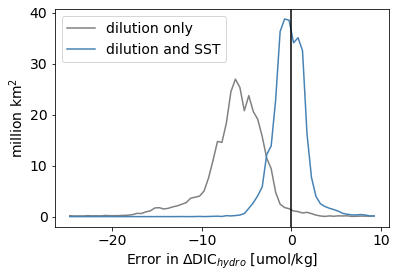

In [272]:
# from xhistogram.xarray import histogram
# all_dhydro = ph_dilutealk + ph_dilutedic_tdic + ph_t - 3 * ph_fix # predicted delta-hydro
# dilute_dhydro = ph_dilutealk + ph_dilutedic - 2 * ph_fix   # predicted delta-hydro
# dhydro = (pH - pH_s)[70:,:].mean('time')

# ph_error_dilution = xr.DataArray(dilute_dhydro - dhydro, coords=[pH.yt_ocean, pH.xt_ocean], dims=['yt_ocean','xt_ocean'], name = 'error_dilution')
# ph_error_all = xr.DataArray(all_dhydro - dhydro, coords=[pH.yt_ocean, pH.xt_ocean], dims=['yt_ocean','xt_ocean'], name = 'error_dilution_sst')

# err_dilute = histogram(ph_error_dilution, bins=[np.arange(-.01,.006,.0001),], weights = area)
# (err_dilute/1e12).plot(label = 'dilution of Alk, DIC only', color='grey')
# err_dilute_sst = histogram(ph_error_all, bins=[np.arange(-.01,.006,.0001),], weights = area)
# (err_dilute_sst/1e12).plot(label = 'dilution of Alk, DIC + \nSST-adjusted DIC and pH', color = 'steelblue')
# plt.axvline(0,color='k')

# plt.xticks(rotation=15)
# plt.ylabel('million km$^2$')
# plt.xlabel('Error in $\Delta$pH$_{hydro}$')
# plt.legend(fontsize = 12)



# delta_alk = (alk - alk_s)/alk_s
# dic_hydro_dilute = (delta_alk*dic_s )[70:,25:-20,:].mean('time')*1e6
# d_dic_sst = -7* (t-t_s)[70:,25:-20,:].mean('time')
# dDIC_hydro = (dic - dic_s)[70:,25:-20,:].mean('time')*1e6

# err_1 = xr.DataArray(dic_hydro_dilute - dDIC_hydro, coords=[dic.yt_ocean[25:-20], dic.xt_ocean], dims=['yt_ocean','xt_ocean'], name = 'error_dilution')
# err_2 = xr.DataArray(dic_hydro_dilute + d_dic_sst - dDIC_hydro, coords=[dic.yt_ocean[25:-20], dic.xt_ocean], dims=['yt_ocean','xt_ocean'], name = 'error_dilution_sst')

# err_dilute = histogram(err_1, bins=[np.arange(-25,10,.5),], weights = area[25:-20,:])
# (err_dilute/1e12).plot(label = 'dilution only', color='grey')

# err_dilutesst = histogram(err_2, bins=[np.arange(-25,10,.5),], weights = area[25:-20,:])
# (err_dilutesst/1e12).plot(label = 'dilution and SST', color='steelblue')
# plt.axvline(0, color='k')
# plt.legend()
# plt.xlabel('Error in $\Delta$DIC$_{hydro}$ [umol/kg]')
# plt.ylabel('million km$^2$')
